# **EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_parquet('/content/drive/My Drive/All_Sparcs_Dataset/sparcs_all_years_for_EDA.parquet')

In [ ]:
df.shape

(1230805, 22)

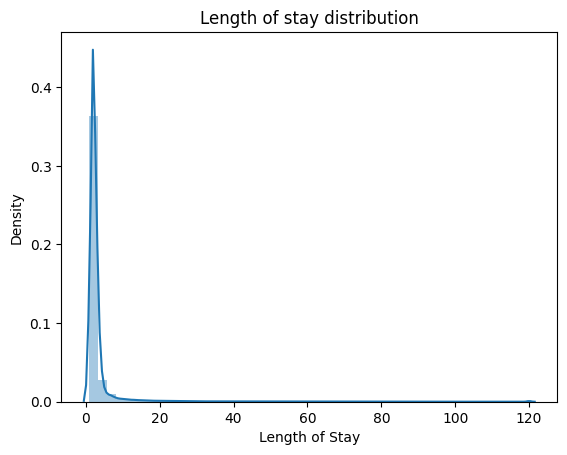

In [ ]:
#LOS data distribution
sns.distplot(df['Length of Stay'])
plt.title('Length of stay distribution')
plt.show()

The length of stay is highly skewed and the max density lies somewhere at 2 days

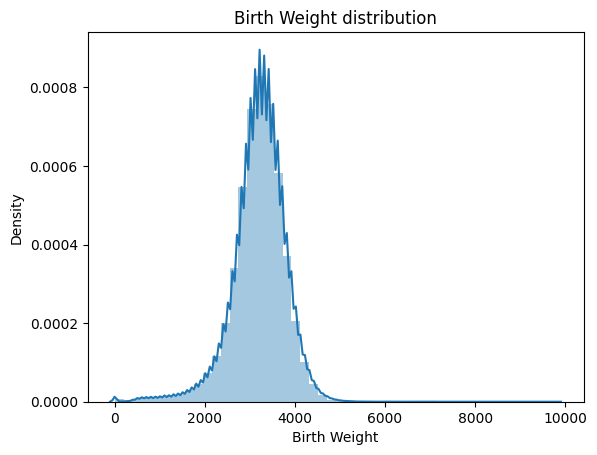

In [ ]:
#birth weight distribution
sns.distplot(df['Birth Weight'])
plt.title('Birth Weight distribution')
plt.show()

It is mostly concentrated between 2000gm to 4000gm

**Univariate Analysis**

In [ ]:
# checking distinct value of each column
df.nunique()

,0
Hospital County,50
Facility Name,141
Age Group,5
Zip Code - 3 digits,51
Gender,3
Race,4
Ethnicity,4
Length of Stay,120
Patient Disposition,19
Discharge Year,6


In [ ]:
#since there are 120 unique values of length of stay, so I want to check what are the values
print(sorted(df['Length of Stay'].unique()))

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), 

County wise patients los

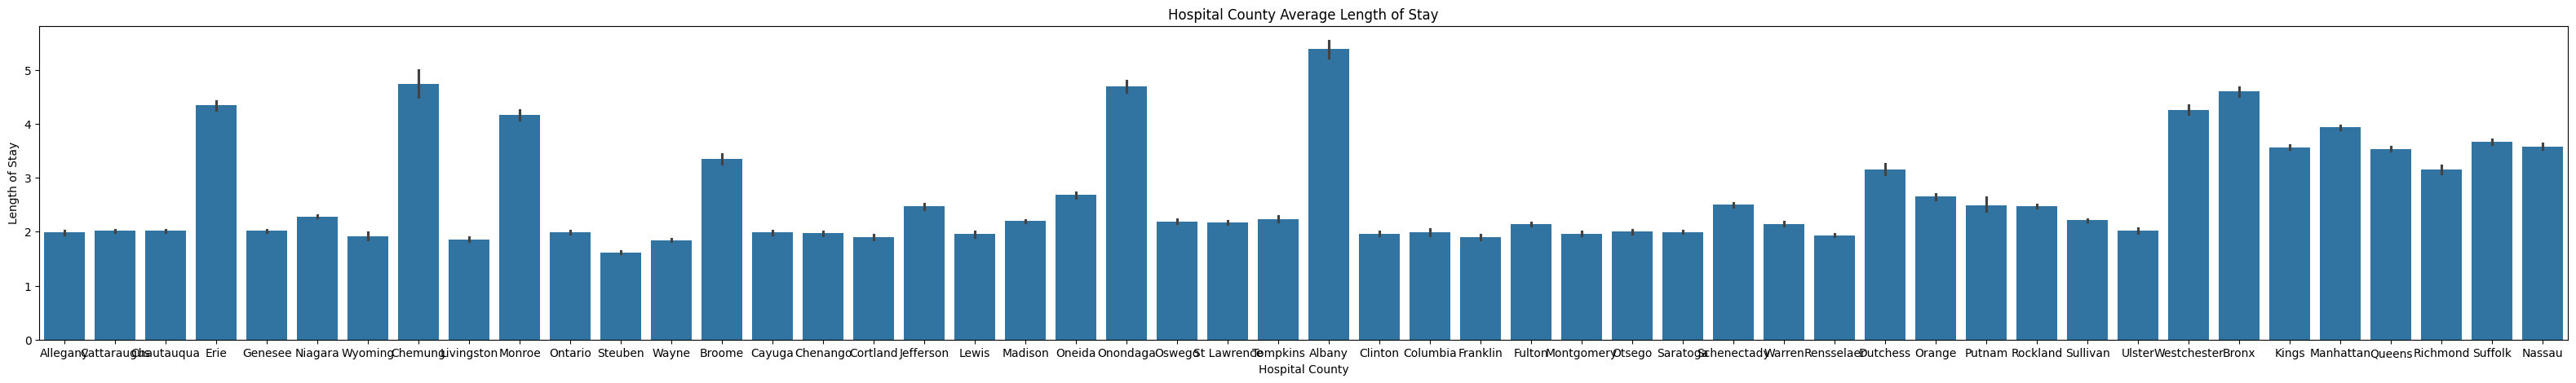

In [ ]:
plt.figure(figsize=[40,5])
sns.barplot(data=df, x='Hospital County',y='Length of Stay')
plt.title("Hospital County Average Length of Stay")
plt.show()

hospital county v/s LOS v/s discharge year

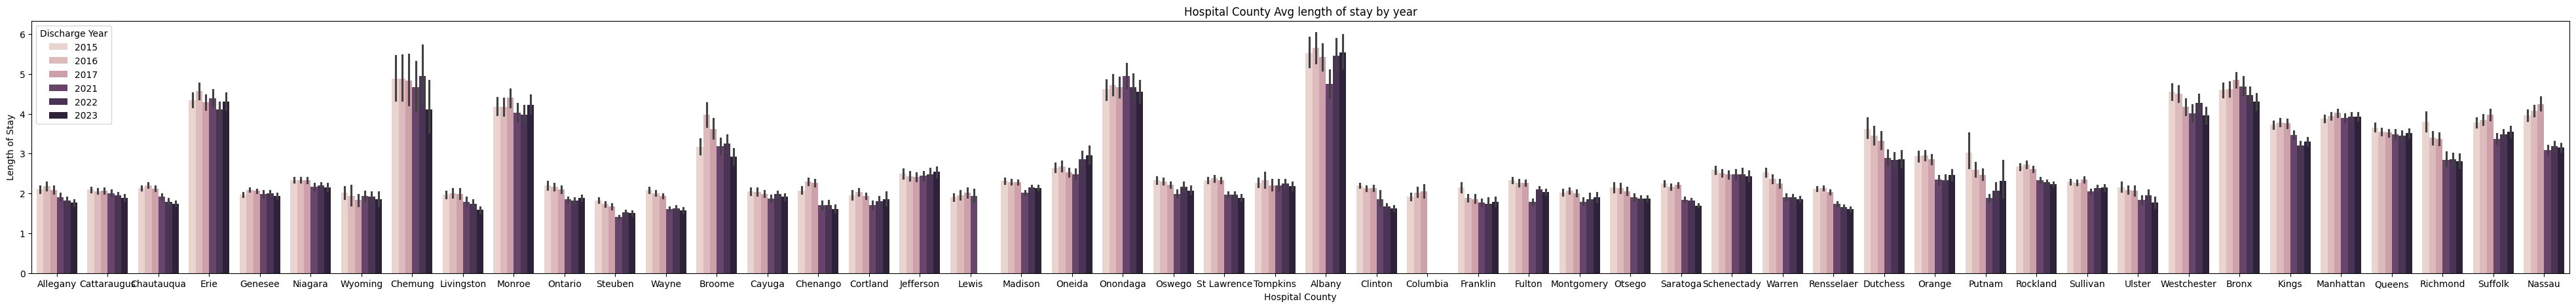

In [ ]:
# County Wise Length of Stay and Patients
plt.figure(figsize=[50,5])
sns.barplot(data=df, x='Hospital County',y='Length of Stay',hue='Discharge Year')
plt.title("Hospital County Avg length of stay by year")
plt.show()

hospital county v/s no. of patients(rows) of that county

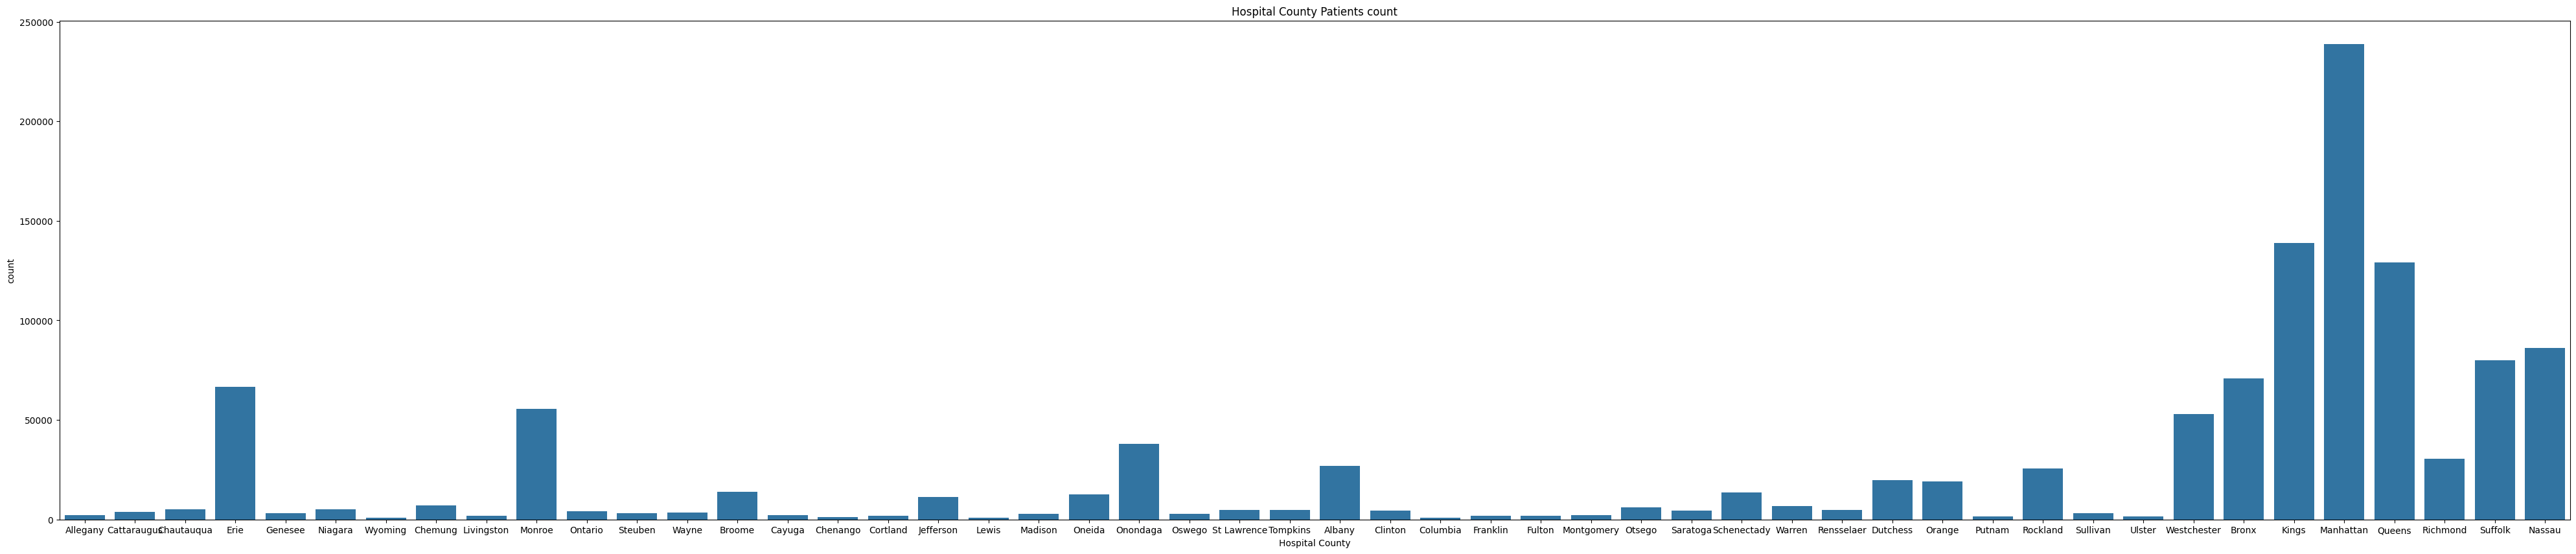

In [ ]:
# County Wise Length of Stay and Patients
plt.figure(figsize=[50,10])
sns.countplot(data=df, x='Hospital County')
plt.title("Hospital County Patients count")
plt.show()

1.   Maximum babies are born(and discharged) in Manhattan
2.   Albany has the highest length of stay of newborns

1.  The length of stay for some hospital counties decreses year by year, for some it increases and for most counties it's a mix of both

Age group v/s LOS

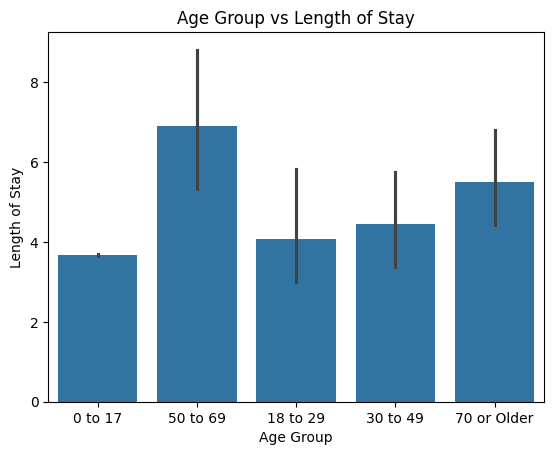

In [ ]:
sns.barplot(data=df, x='Age Group',y='Length of Stay')
plt.title("Age Group vs Length of Stay")
plt.show()

in barplot each bar represent avg(or median) los of each age group

Age group refers to age of the mother, max LOS is in the age group 50 to 69

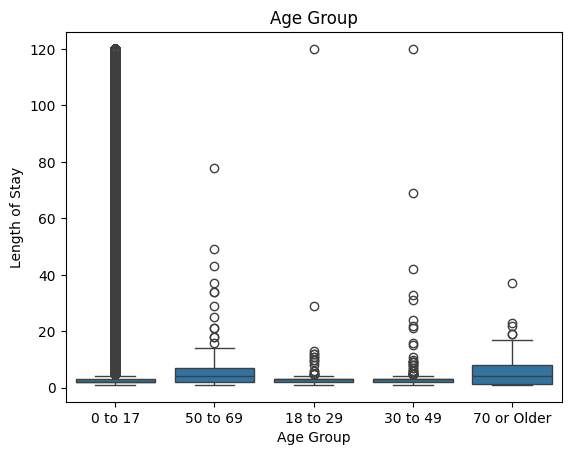

In [ ]:
sns.boxplot(data=df,x='Age Group',y='Length of Stay')
plt.title("Age Group")
plt.show()

It gives the exact ranges and outliers of an age group

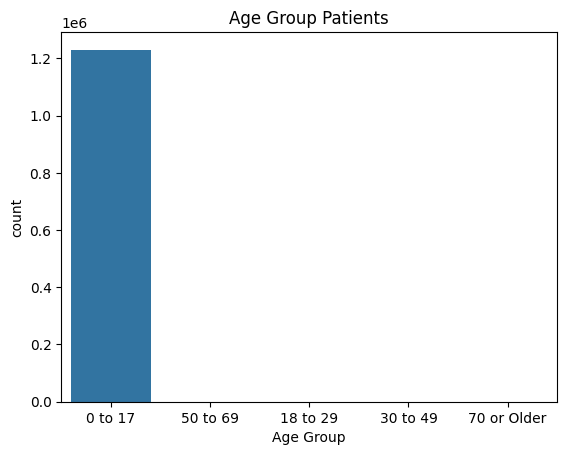

In [ ]:
sns.countplot(data=df,x='Age Group')
plt.title("Age Group Patients")
plt.show()

Max patients are there in the age group 0-17

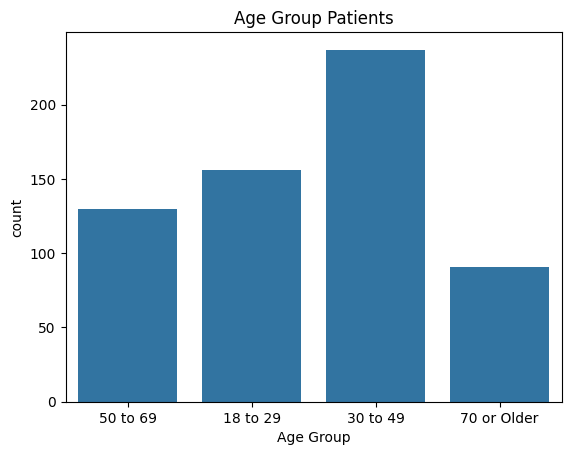

In [ ]:
sns.countplot(data=df[df['Age Group']!='0 to 17'],x='Age Group')
plt.title("Age Group Patients")
plt.show()

these age groups have much lower patient count compared to 0-17

Groups my DataFrame by Age Group and APR DRG Description.
For each group, counts the number of non-null entries in the column Hospital County.

In [ ]:
# Generally new born age group should be between 0-17 , Checking what all DRG are there in other age groups
df.groupby(['Age Group','APR DRG Description'])['Hospital County'].count()

Age Group    APR DRG Description                                               
0 to 17      Acute anxiety & delirium states                                        1
             Adjustment disorders & neuroses except depressive diagnoses            1
             Asthma                                                                 3
             BACTERIAL AND TUBERCULOUS INFECTIONS OF NERVOUS SYSTEM                 1
             BPD & oth chronic respiratory diseases arising in perinatal period    19
                                                                                   ..
70 or Older  Shoulder, upper arm & forearm procedures except joint replacement      1
             Syncope & collapse                                                     1
             Urethral & transurethral procedures                                    2
             Uterine & adnexa procedures for ovarian & adnexal malignancy           1
             Vertigo & other labyrinth disorders                                    1
Name: Hospital County, Length: 310, dtype: int64



1.   Maximum patients are in the age group 0-17 with high los(though the avg says max los is in the 50-69 group)
2.   Other age group has very less patients


1.   There is a data quality issue, the age group might refer to the age of the mother(since 50,60 ages are there) or it might be of the newborns that will anyway lie in the 0-17 age group. This is found by seeing almost all patients are falling under the 0-17 age category
2.   We found out for a specific age group and DRG description, in how many counties the combination is present to figure out what is the issue likely in the age group c9lumn


1.   For a few APR DRG the mothers age is mentioned and its not in a few counties or hospitals, it is in several counties.
2.   for few diagnosis the mother's age is mentioned like problems related to uterus, periods etc. and also I found it's not in a few hospitals, I found the age groups 20,50,60,etc. in several counties but the no. of entries in those age group is really small







Gender v/s LoS

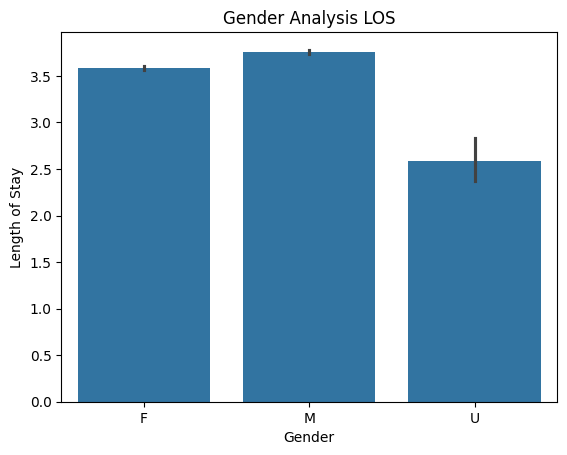

In [ ]:
sns.barplot(data=df,x='Gender',y='Length of Stay')
plt.title("Gender Analysis LOS")
plt.show()

barplot gives the avg los based on gender

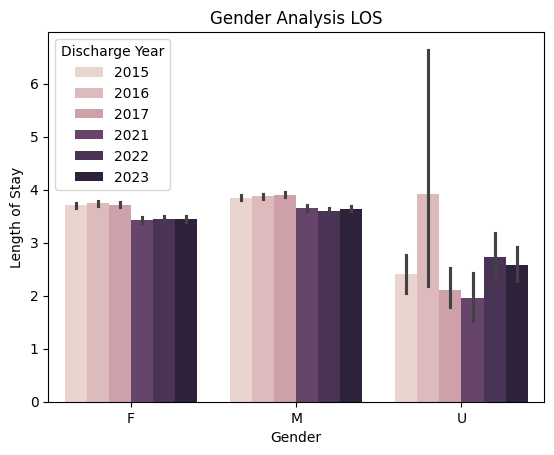

In [ ]:
sns.barplot(data=df,x='Gender',y='Length of Stay',hue='Discharge Year')
plt.title("Gender Analysis LOS")
plt.show()

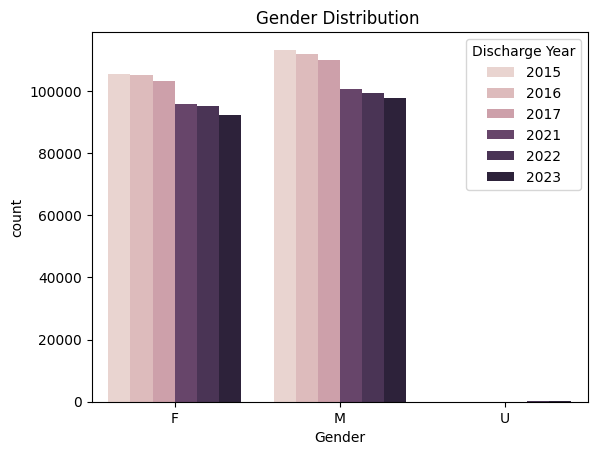

In [ ]:
sns.countplot(data=df,x='Gender',hue='Discharge Year')
plt.title("Gender Distribution ")
plt.show()



1.   The no. of patients in the U category is less
2.   The LoS of males is relatively high


1.   Year on year , the patient count and los has decreased for all the gender groups





Race V/s los

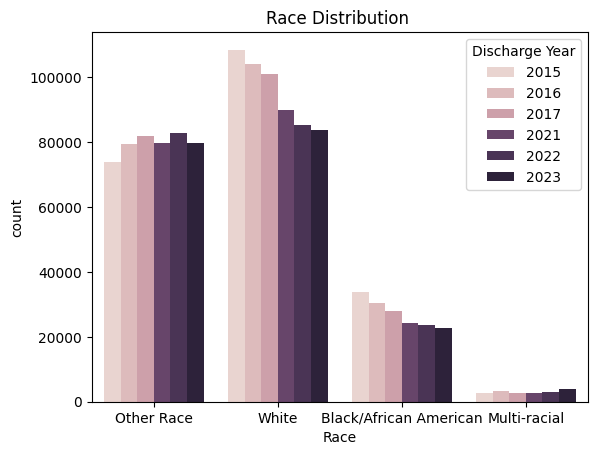

In [ ]:
sns.countplot(data=df,x='Race',hue='Discharge Year')
plt.title("Race Distribution ")
plt.show()

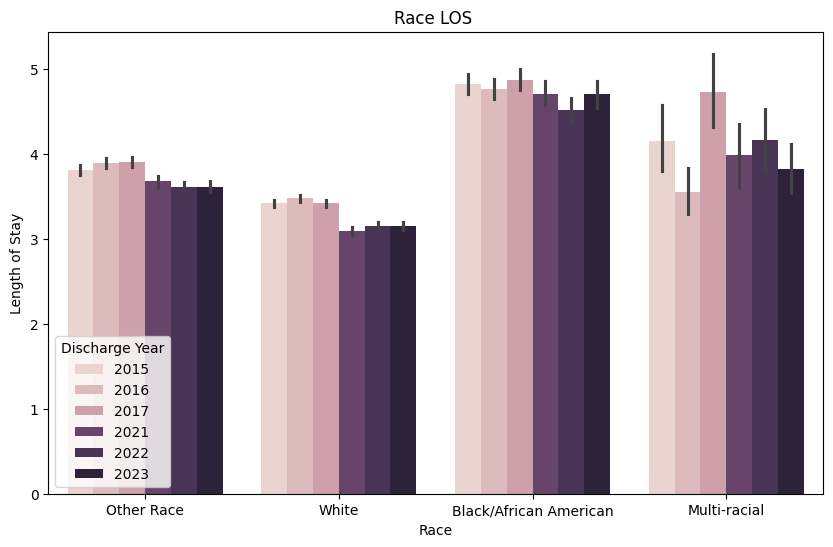

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=df,x='Race',y='Length of Stay',hue='Discharge Year')
plt.title("Race LOS ")
plt.show()


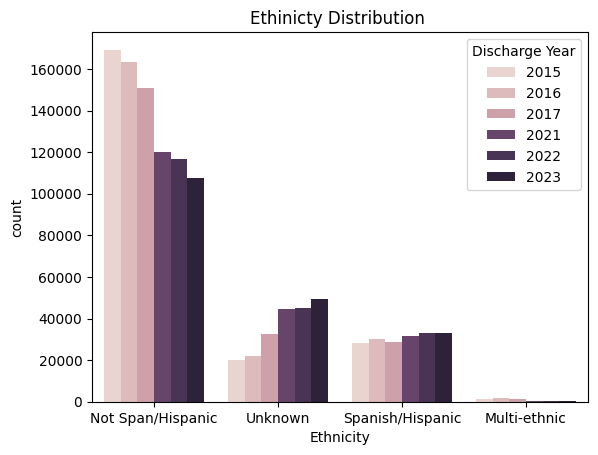

In [ ]:
sns.countplot(data=df,x='Ethnicity',hue='Discharge Year')
plt.title("Ethinicty Distribution ")
plt.show()


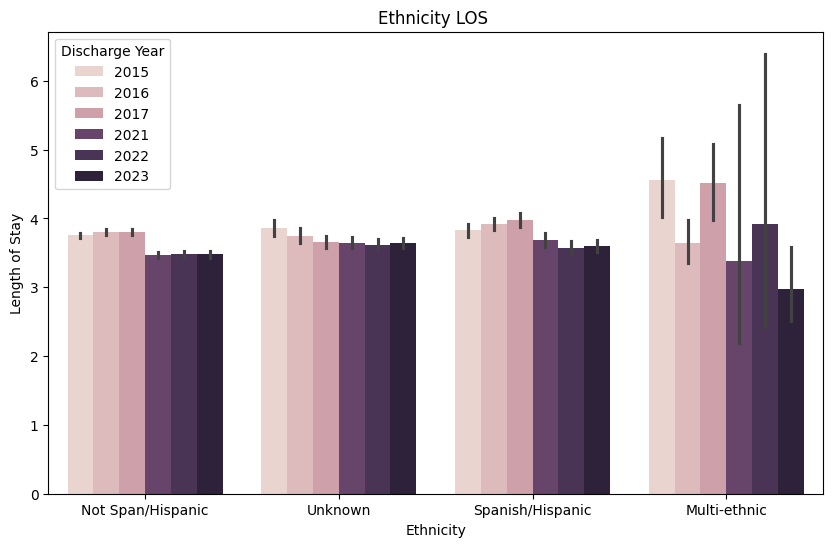

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=df,x='Ethnicity',y='Length of Stay',hue='Discharge Year')
plt.title("Ethnicity LOS ")
plt.show()



1.   White race has the highest no. of patients
2.   LOS(Average) is highest for the Afro-American race


1.   Non Span/Hispanic Ethinicity has highest patients(though it decreases year on year)and their year on year Length of Stay is consistent
2.   Multi-ethnic got the highest category in the initial years





LOS based on risk of mortality

Text(0.5, 1.0, 'APR Risk of Mortality LOS ')

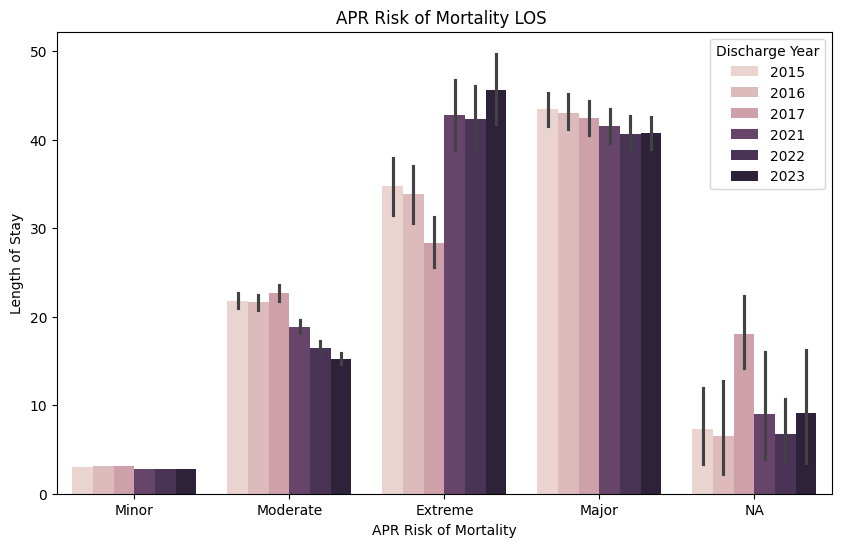

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=df,x='APR Risk of Mortality',y='Length of Stay',hue='Discharge Year')
plt.title("APR Risk of Mortality LOS ")

Text(0.5, 1.0, 'APR Risk of Mortality Distribution')

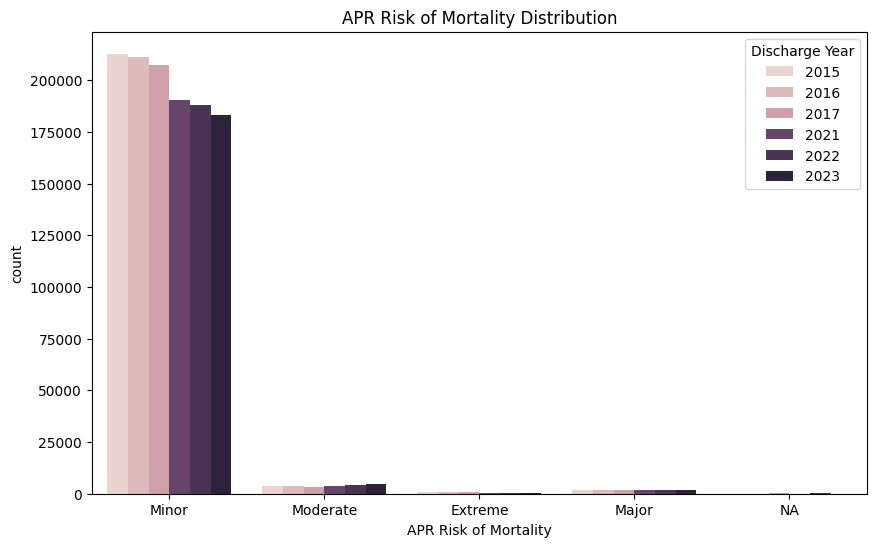

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data=df,x='APR Risk of Mortality',hue='Discharge Year')
plt.title("APR Risk of Mortality Distribution")

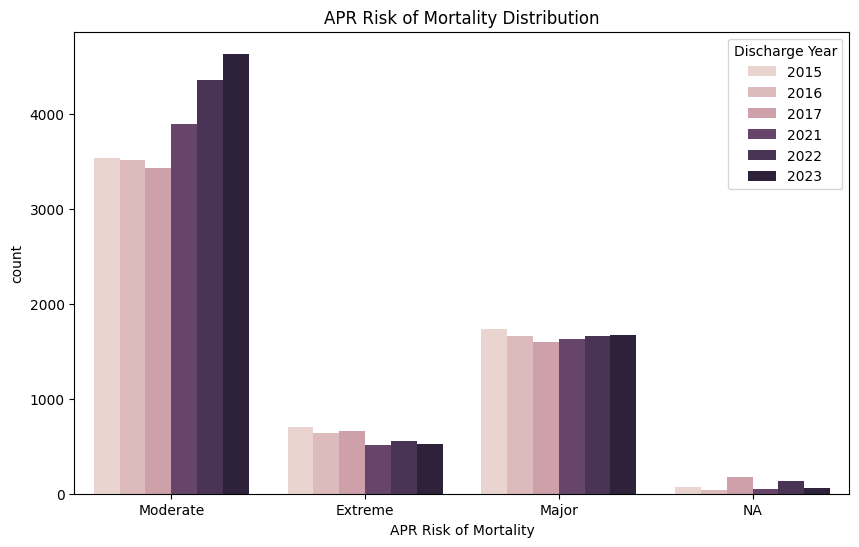

In [ ]:
#APR risk of mortality count for non minor categories
plt.figure(figsize=[10,6])
sns.countplot(data=df[df['APR Risk of Mortality']!='Minor']
              ,x='APR Risk of Mortality',hue='Discharge Year')
plt.title("APR Risk of Mortality Distribution")
plt.show()




1.   LoS in the recent years is highest for the extreme category but overall the major category also has a high los
2.   The patient count of minor risk is maximum(much higher than the other categories) but the count decreases, the count of moderate risk increases year on year



APR severity of illness based los

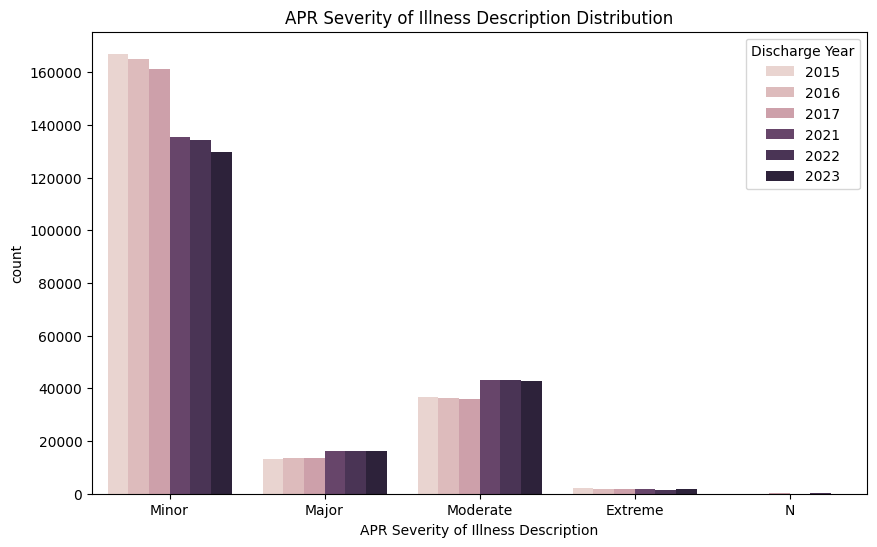

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data=df
              ,x='APR Severity of Illness Description',hue='Discharge Year')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

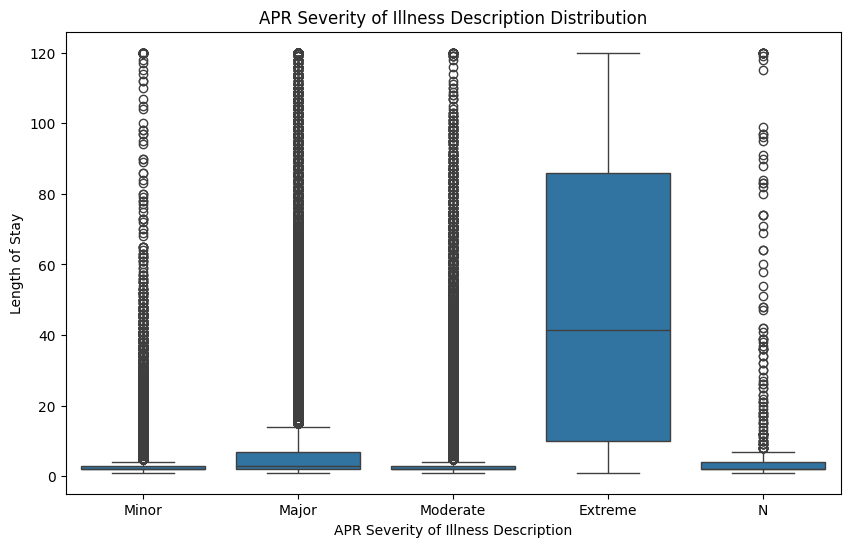

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df
              ,x='APR Severity of Illness Description',y='Length of Stay')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

Minor & Moderate: The boxes are very short and close to the bottom. This tells you that for newborns with 'Minor' or 'Moderate' severity, the typical stay is very short (the median line is around 2-3 days). The data is not very spread out, but there are many outliers, meaning some of these babies have very long stays, but it's uncommon.

Major: The box is slightly higher. The median stay is longer than for minor/moderate cases (maybe around 5 days). This makes perfect sense.

Extreme: This is the most important group. The box is much taller and higher up.

The median stay is dramatically longer (around 40 days).

The box is very wide, which means the length of stay is highly variable and unpredictable. An "Extreme" case could be 10 days or 80 days.

N: This category likely means "Not available" or "Not Classified." Its box looks very similar to 'Minor', suggesting that cases with unclassified severity are generally not severe.



In [ ]:
print(df['APR Severity of Illness Description'].value_counts())

APR Severity of Illness Description
Minor       892561
Moderate    238075
Major        88978
Extreme      10666
N              525
Name: count, dtype: int64


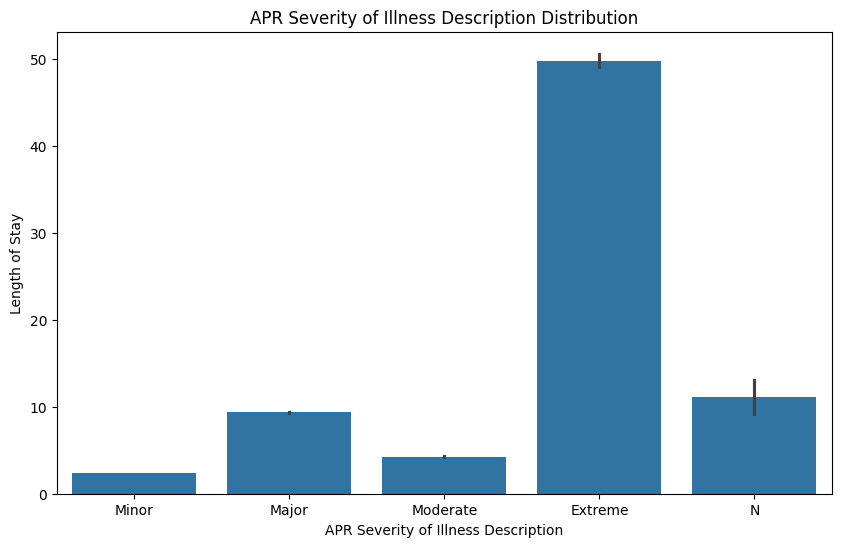

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=df
              ,x='APR Severity of Illness Description',y='Length of Stay')
plt.title("APR Severity of Illness Description Distribution")
plt.show()

For severity of illness


1.   The minor category has a lot more patients(But the count is decreasing)
2.   THe major and moderate counts are increasing


1.   Extreme has a high los





Medical surgical description

## 'Medical' 🩺
This means the patient was treated primarily with non-invasive methods. The focus was on management through medication, observation, and diagnostic tests rather than surgery.Like Treatment for jaundice (phototherapy).
Management of low blood sugar.Observation for suspected infection.

## 'Surgical'
This means the primary reason for the stay involved a significant, invasive procedure that typically takes place in an operating room.

For a newborn, this is less common but would include:

Repair of a congenital heart defect.

Surgery for a birth defect
## 'NA'
This typically stands for "Not Applicable." In the context of the SPARCS dataset, this category is often used for cases that don't fit the standard definition of a medical illness or a surgical procedure.

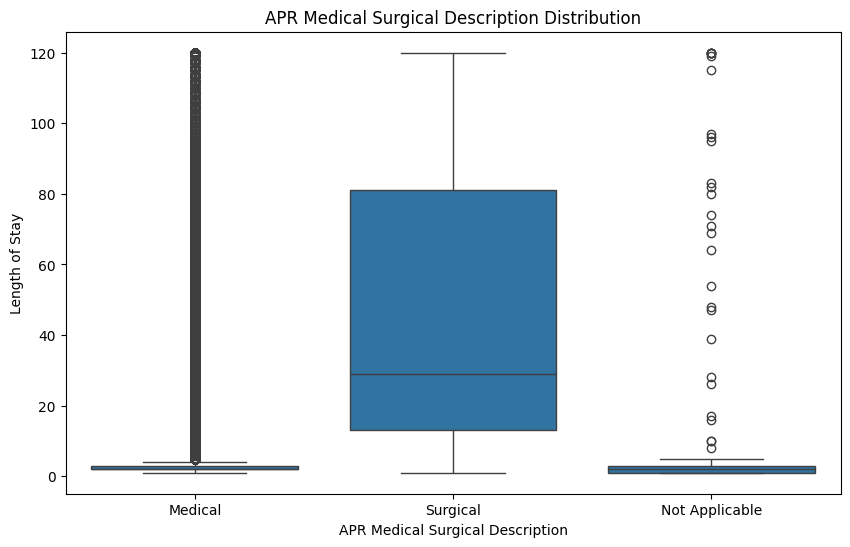

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(data=df
              ,x='APR Medical Surgical Description',y='Length of Stay')
plt.title("APR Medical Surgical Description Distribution")
plt.show()




*   For the Medical and N/A the typical stay is very short (the median line is around 2-3 days). The data is not very spread out, but there are many outliers
*   For surgical the box is much taller and higher up.The median stay is dramatically longer (around 30 days).The box is very wide, which means the length of stay is highly variable and unpredictable.



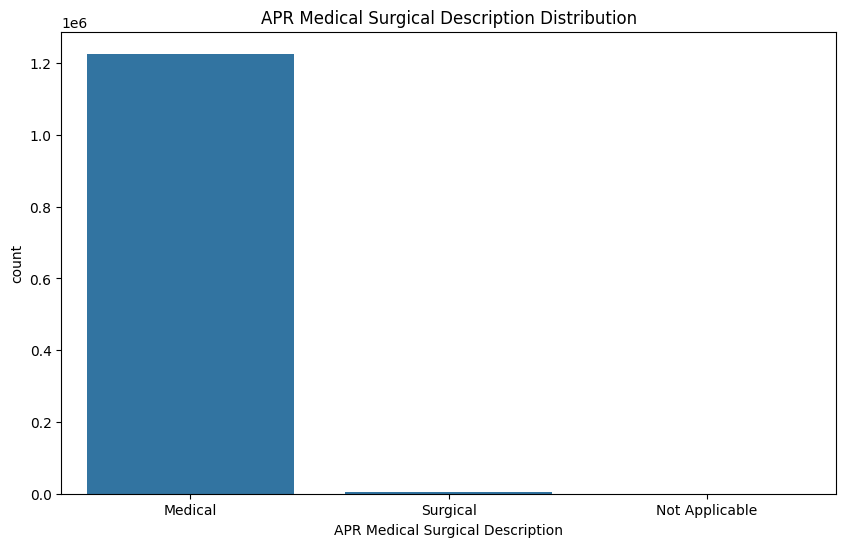

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data=df
              ,x='APR Medical Surgical Description')
plt.title("APR Medical Surgical Description Distribution")
plt.show()

Most count is in the medical range

Payment topology

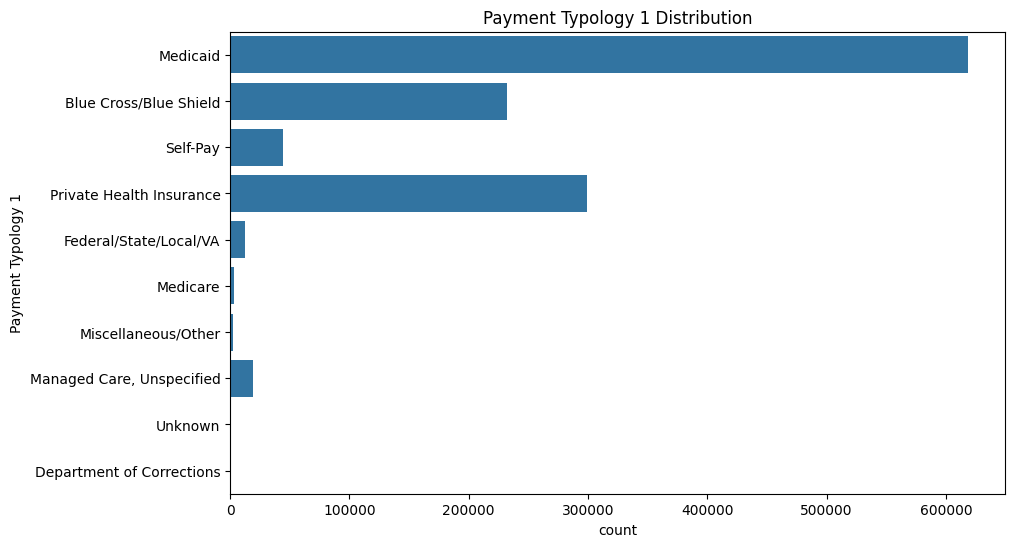

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data=df
              ,y='Payment Typology 1')
plt.title("Payment Typology 1 Distribution")
plt.show()

Medicaid is a government-funded health insurance program in the United States for low-income individuals and families.the count in this category is highest

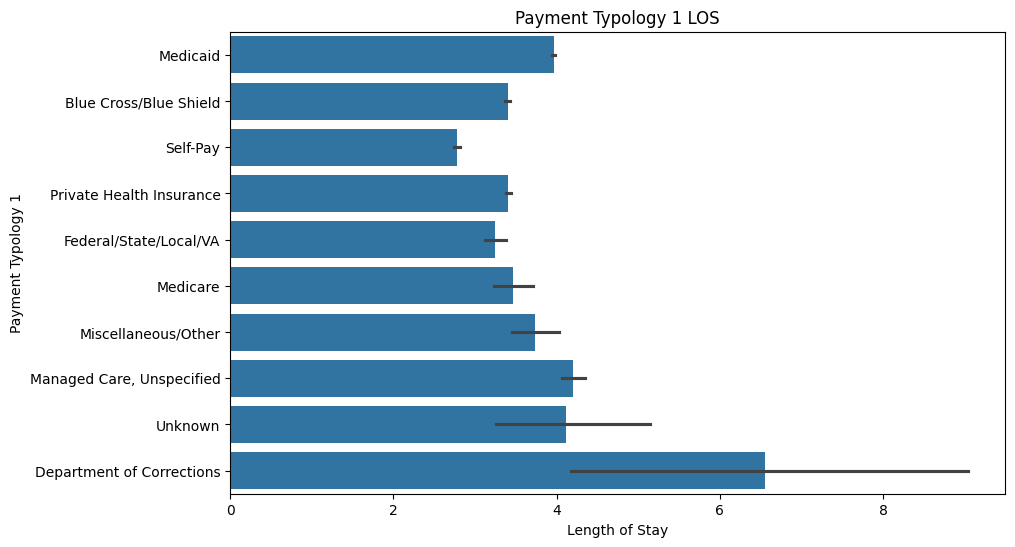

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(data=df
              ,y='Payment Typology 1',x='Length of Stay')
plt.title("Payment Typology 1 LOS")
plt.show()

Dept. of corrections has highest los

# **Bivariate and Multivariate analysis**

Correlation coefficient (usually Pearson’s r) measures how two variables change together.
Ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation).
0 means no linear relationship.

In [ ]:
#Scans through all numeric columns in df.Computes the correlation between every pair of columns.Returns a correlation matrix
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                Length of Stay  Discharge Year  Birth Weight  Total Charges  \
Length of Stay        1.000000       -0.014792     -0.438274       0.795228   
Discharge Year       -0.014792        1.000000     -0.023726       0.051315   
Birth Weight         -0.438274       -0.023726      1.000000      -0.318266   
Total Charges         0.795228        0.051315     -0.318266       1.000000   
Total Costs           0.822871        0.044655     -0.333909       0.903661   

                Total Costs  
Length of Stay     0.822871  
Discharge Year     0.044655  
Birth Weight      -0.333909  
Total Charges      0.903661  
Total Costs        1.000000  


total charges and costs are highly correlated with los.
los is negetively correlated to birtweight. This means a very less birthwt will likely have high los

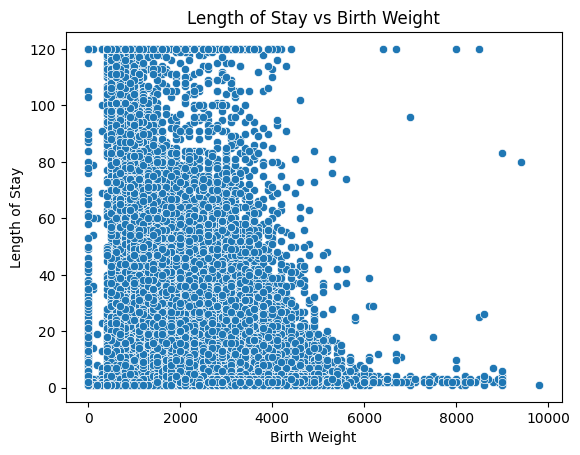

In [ ]:
sns.scatterplot(data=df,x="Birth Weight",y='Length of Stay')
plt.title("Length of Stay vs Birth Weight")
plt.show()

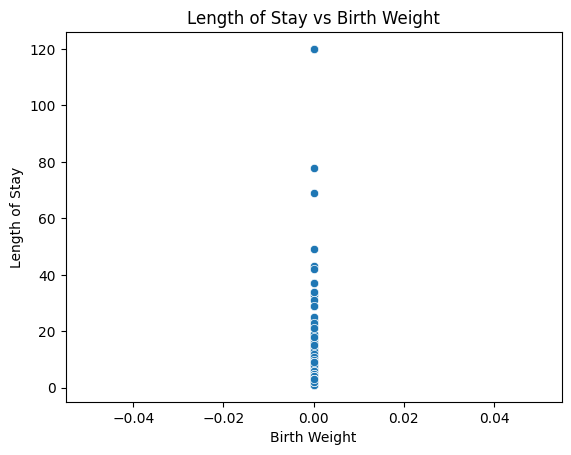

In [ ]:
# apart from the age group 0-17
sns.scatterplot(data=df[df['Age Group']!='0 to 17'],x="Birth Weight",y='Length of Stay')
plt.title("Length of Stay vs Birth Weight")
plt.show()

Birth Weight is having -ve correlation with Age Group , also age group other than 0-17 has 0 birth weight , so for newborn analysis and model , Age Group 0 - 17 will be considered

This clearly validated the data quality error that the age group v/s los graphs figured out

In [ ]:
# creating new dataframe for agegroup 0 to 17
df_age=df[df['Age Group']=='0 to 17']

In [ ]:
df_age.shape

(1230191, 22)

In [ ]:
# Looking at Major Diagnostic Category
df_age.groupby(['APR MDC Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
APR MDC Description,,,,
Newborns and Other Neonates with Conditions Originating in the Perinatal Period,648372,1,120,3.789889
NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD,391190,1,120,3.530019
NEWBORNS & OTHER NEONATES WITH CONDTN ORIG IN PERINATAL PERIOD,189999,1,120,3.541924
PRE MDC,226,1,120,8.119469
Pre-MDC or Ungroupable,195,1,120,19.251282
"Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts",36,1,120,28.361111
Diseases and Disorders of the Respiratory System,28,1,120,35.464286
FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES,18,2,120,28.833333
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,15,4,80,33.000000


In [ ]:
print(df_age[df_age['Length of Stay'] == 120]['APR MDC Description'].value_counts())

APR MDC Description
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         632
NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD                         498
NEWBORNS & OTHER NEONATES WITH CONDTN ORIG IN PERINATAL PERIOD                                          266
Pre-MDC or Ungroupable                                                                                    5
PRE MDC                                                                                                   4
Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts      3
Diseases and Disorders of the Nervous System                                                              1
Diseases and Disorders of the Respiratory System                                                          1
FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES                                 1
Name: co

In [ ]:
# DRG Analysis
df_age.groupby(['APR DRG Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
APR DRG Description,,,,
"Neonate birthwt >2499g, normal newborn or neonate w other problem",1044187,1,120,2.253725
"Neonate bwt 2000-2499g, normal newborn or neonate w other problem",47979,1,61,3.806624
Neonate birthwt >2499g w other significant condition,29733,1,108,5.090169
Neonate birthwt >2499g w major anomaly,20042,1,120,5.593104
"Neonate, birthwt >2499g w resp dist synd/oth maj resp cond",17192,1,114,6.896522
...,...,...,...,...
Other pneumonia,1,8,8,8.000000
"Other kidney & urinary tract diagnoses, signs & symptoms",1,9,9,9.000000
Other small & large bowel procedures,1,78,78,78.000000


In [ ]:
df_age.groupby(['CCSR Diagnosis Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCSR Diagnosis Description,,,,
Liveborn,1228024,1,120,3.658945
Other perinatal conditions,514,1,120,9.533074
Short gestation; low birth weight; and fetal growth retardation,405,1,120,24.550617
Hemolytic jaundice and perinatal jaundice,292,1,24,2.407534
Respiratory distress syndrome,174,1,120,24.678161
...,...,...,...,...
Pneumonia (except that caused by tuberculosis or sexually transmitted disease),1,8,8,8.000000
Skin and subcutaneous tissue infections,1,2,2,2.000000
Sickle cell anemia,1,3,3,3.000000


In [ ]:
df_age.groupby(['CCSR Procedure Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCSR Procedure Description,,,,
CIRCUMCISION,252280,1,120,2.591311
PROPHYLACTIC VAC/INOCUL,190316,1,120,2.727511
VACCINATIONS,175296,1,120,2.396923
No Procedure Recorded,174944,1,120,2.028838
NO PROC,142667,1,120,2.419999
...,...,...,...,...
CANCER CHEMOTHERAPY,1,2,2,2.000000
BONE MARROW BIOPSY,1,15,15,15.000000
"TENDON, MUSCLE, BURSA, AND LIGAMENT REPAIR (EXCLUDING PERINEAL)",1,3,3,3.000000


Looks like even in age group 0-17 maximum records are for Liveborn others are very few,
Looking at data based on "Newborns and Other Neonates with Conditions Originating in the Perinatal Period"

The '0-17' age group is very broad. While it contains all the newborns, it could also technically include a 16-year-old who was admitted for a broken leg or an appendectomy. These cases are not relevant to this project, which is about newborns and their specific conditions. The first comment, ...maximum records are for Liveborn..., confirms their suspicion that the filter isn't perfect.



Making a seperate dataset for the newborn MDC

In [ ]:
# This will show the exact variations in data
df_age['APR MDC Description'].value_counts()

,count
APR MDC Description,
Newborns and Other Neonates with Conditions Originating in the Perinatal Period,648372
NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD,391190
NEWBORNS & OTHER NEONATES WITH CONDTN ORIG IN PERINATAL PERIOD,189999
PRE MDC,226
Pre-MDC or Ungroupable,195
"Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts",36
Diseases and Disorders of the Respiratory System,28
FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES,18
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,15


THe problem is this MDC 'Newborns and Other Neonates with Conditions Originating in the Perinatal Period' has 3 different descriptions with very little variation in text. We will make them one by replacing them to the standard description

In [ ]:
# The single, correct description you want everything to become
standard_description = 'Newborns and Other Neonates with Conditions Originating in the Perinatal Period'

# A dictionary mapping the incorrect versions to the correct one
# --- IMPORTANT: Replace the keys with the exact text from your data ---
replacement_map = {
    'Newborns and Other Neonates with Conditions Originating in the Perinatal Period': standard_description,
    'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD': standard_description,
    'NEWBORNS & OTHER NEONATES WITH CONDTN ORIG IN PERINATAL PERIOD' : standard_description
}

In [ ]:
# Replace the values in the column using your map
df_age['APR MDC Description'].replace(replacement_map, inplace=True)

# Verify that it worked. You should now only see one category.
df_age['APR MDC Description'].value_counts()

,count
APR MDC Description,
Newborns and Other Neonates with Conditions Originating in the Perinatal Period,1229561
PRE MDC,226
Pre-MDC or Ungroupable,195
"Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts",36
Diseases and Disorders of the Respiratory System,28
FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES,18
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,15
Diseases and Disorders of the Digestive System,12
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,10


NOw it's resolved , we will make a dataframe for the neonate MDC ensuring that every single patient in our new DataFrame (df_mdc) is truly a newborn or neonate being treated for a condition related to birth

In [ ]:
df_mdc=df_age[df_age['APR MDC Description']=='Newborns and Other Neonates with Conditions Originating in the Perinatal Period']

In [ ]:
df_mdc.shape

(1229561, 22)

In [ ]:
# Looking at MDC 15 data set for diagnosis
df_mdc.groupby(['CCSR Diagnosis Description'])['Length of Stay'].agg(['count','min','max','mean']).sort_values(by='count',ascending=False)

,count,min,max,mean
CCSR Diagnosis Description,,,,
Liveborn,1227609,1,120,3.655732
Other perinatal conditions,481,1,120,8.272349
Short gestation; low birth weight; and fetal growth retardation,357,1,120,23.386555
Hemolytic jaundice and perinatal jaundice,291,1,24,2.412371
Respiratory distress syndrome,164,1,120,23.853659
Other specified and unspecified perinatal conditions,148,1,32,4.763514
Other congenital anomalies,51,1,95,14.176471
Cardiac and circulatory congenital anomalies,49,1,63,14.571429
Essential hypertension,43,1,21,2.395349


Although we see the liveborn is most in count, but we cant filter or narrow the data more since we will lose other features. The filtering we did for mdc is sufficient to constrict to newborns only

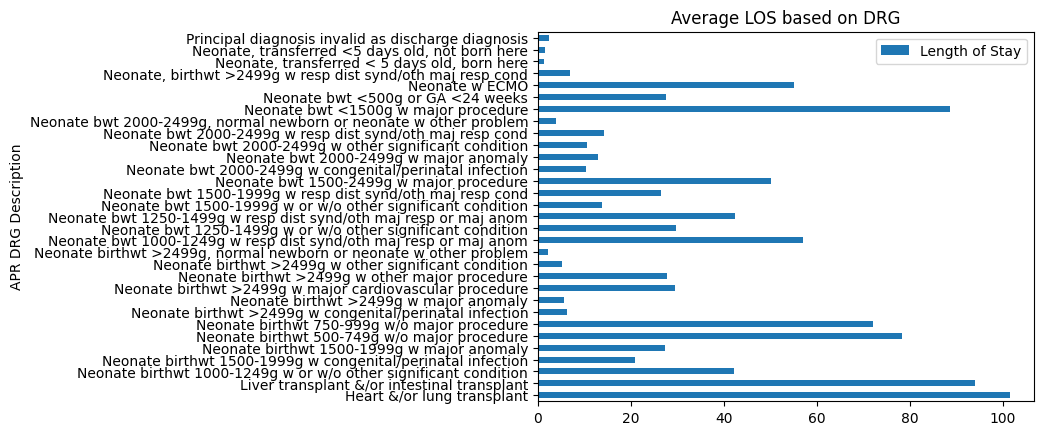

In [ ]:
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],aggfunc='mean').plot.barh()
plt.title("Average LOS based on DRG")
plt.show()

In [ ]:
# Maximum data set is of liveborn between agegroup 0-17 , so checking Liveborn Procedures,i.e for the CCSR diag Liveborn what are the CCSR procedures
df_mdc[df_mdc['CCSR Diagnosis Description']=='Liveborn'].groupby(['CCSR Procedure Description'])['Length of Stay'].agg(['min','max','mean','count']).sort_values(by='mean',ascending=False)

,min,max,mean,count
CCSR Procedure Description,,,,
CARDIAC PACING,120,120,120.000000,1
DECOMPRESSIVE CRANIECTOMY,120,120,120.000000,1
OT EXTRAOCULAR MUSC/ORB,120,120,120.000000,1
GI SYSTEM ENDOSCOPY WITHOUT BIOPSY (DIAGNOSTIC),120,120,120.000000,1
HEART ASSIST DEVICE PROCEDURES,120,120,120.000000,1
...,...,...,...,...
ROUTINE CHEST X-RAY,1,13,1.882353,34
PLAIN RADIOGRAPHY,1,4,1.686567,67
HYPERBARIC OXYGEN THERAPY,1,2,1.105263,19


In [ ]:
# Year on Year Length of Stay per DRG
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Discharge Year'],aggfunc='mean')
#this gives the mean los for a specific DRG for a specific year

Length of Stay             \
Discharge Year                                               2015       2016   
APR DRG Description                                                            
Heart &/or lung transplant                                    NaN  50.000000   
Liver transplant &/or intestinal transplant            107.000000        NaN   
Neonate birthwt 1000-1249g w or w/o other signi...      43.815385  44.126866   
Neonate birthwt 1500-1999g w congenital/perinat...      20.695035  20.395161   
Neonate birthwt 1500-1999g w major anomaly              25.964865  26.788969   
Neonate birthwt 500-749g w/o major procedure            73.950000  77.175084   
Neonate birthwt 750-999g w/o major procedure            68.795247  71.738574   
Neonate birthwt >2499g w congenital/perinatal i...       6.366396   6.091917   
Neonate birthwt >2499g w major anomaly                   5.528267   5.399428   
Neonate birthwt >2499g w major cardiovascular p...      29.387597  28.341880   
Neonate birthwt >2499g w other major procedure          27.804348  20.554167   
Neonate birthwt >2499g w other significant cond...       5.586814   5.615113   
Neonate birthwt >2499g, normal newborn or neona...       2.421556   2.410411   
Neonate bwt 1000-1249g w resp dist synd/oth maj...      55.387405  57.532110   
Neonate bwt 1250-1499g w or w/o other significa...      30.060932  30.641434   
Neonate bwt 1250-1499g w resp dist synd/oth maj...      41.494545  42.005319   
Neonate bwt 1500-1999g w or w/o other significa...      14.092030  14.556748   
Neonate bwt 1500-1999g w resp dist synd/oth maj...      26.419355  26.682353   
Neonate bwt 1500-2499g w major procedure                46.827586  46.396694   
Neonate bwt 2000-2499g w congenital/perinatal i...      10.508475  10.655963   
Neonate bwt 2000-2499g w major anomaly                  12.838780  14.120818   
Neonate bwt 2000-2499g w other significant cond...      10.757856  10.826972   
Neonate bwt 2000-2499g w resp dist synd/oth maj...      13.804910  14.167421   
Neonate bwt 2000-2499g, normal newborn or neona...       4.058187   4.113849   
Neonate bwt <1500g w major procedure                    93.340102  87.391061   
Neonate bwt <500g or GA <24 weeks                       20.377644  21.940439   
Neonate w ECMO                                          43.785714  47.851852   
Neonate, birthwt >2499g w resp dist synd/oth ma...       7.213246   7.025515   
Neonate, transferred < 5 days old, born here             1.358265   1.375489   
Neonate, transferred <5 days old, not born here          1.000000   1.714286   
Principal diagnosis invalid as discharge diagnosis       2.471698   2.518519   

                                                                           \
Discharge Year                                           2017        2021   
APR DRG Description                                                         
Heart &/or lung transplant                          88.000000  120.000000   
Liver transplant &/or intestinal transplant         81.000000         NaN   
Neonate birthwt 1000-1249g w or w/o other signi...  44.328000   36.693548   
Neonate birthwt 1500-1999g w congenital/perinat...  23.741573   22.075000   
Neonate birthwt 1500-1999g w major anomaly          25.269333   30.497297   
Neonate birthwt 500-749g w/o major procedure        76.792517   81.533582   
Neonate birthwt 750-999g w/o major procedure        71.484600   73.193995   
Neonate birthwt >2499g w congenital/perinatal i...   6.344221    6.606007   
Neonate birthwt >2499g w major anomaly               5.135789    5.772770   
Neonate birthwt >2499g w major cardiovascular p...  26.188571   33.058252   
Neonate birthwt >2499g w other major procedure      22.026217   34.922535   
Neonate birthwt >2499g w other significant cond...   5.330060    4.860168   
Neonate birthwt >2499g, normal newborn or neona...   2.394640    2.058749   
Neonate bwt 1000-1249g w resp dist synd/oth maj...  54.977688   58.092369   
Neonate bwt 1250-1499

In [ ]:
# Year on Year Number of Patients per their DRG
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Discharge Year'],aggfunc='count')
# for a specific drg for a specific year this gives the count of the non null los ,Typical Use
#To see case volumes (number of patients) for each DRG across years

Length of Stay            \
Discharge Year                                               2015      2016   
APR DRG Description                                                           
Heart &/or lung transplant                                    NaN       1.0   
Liver transplant &/or intestinal transplant                   1.0       NaN   
Neonate birthwt 1000-1249g w or w/o other signi...          130.0     134.0   
Neonate birthwt 1500-1999g w congenital/perinat...          141.0     124.0   
Neonate birthwt 1500-1999g w major anomaly                  370.0     417.0   
Neonate birthwt 500-749g w/o major procedure                320.0     297.0   
Neonate birthwt 750-999g w/o major procedure                547.0     547.0   
Neonate birthwt >2499g w congenital/perinatal i...         1845.0    1534.0   
Neonate birthwt >2499g w major anomaly                     3237.0    3495.0   
Neonate birthwt >2499g w major cardiovascular p...          129.0     117.0   
Neonate birthwt >2499g w other major procedure              230.0     240.0   
Neonate birthwt >2499g w other significant cond...         5051.0    5386.0   
Neonate birthwt >2499g, normal newborn or neona...       187242.0  184793.0   
Neonate bwt 1000-1249g w resp dist synd/oth maj...          524.0     545.0   
Neonate bwt 1250-1499g w or w/o other significa...          279.0     251.0   
Neonate bwt 1250-1499g w resp dist synd/oth maj...          550.0     564.0   
Neonate bwt 1500-1999g w or w/o other significa...         2108.0    1956.0   
Neonate bwt 1500-1999g w resp dist synd/oth maj...          775.0     850.0   
Neonate bwt 1500-2499g w major procedure                    116.0     121.0   
Neonate bwt 2000-2499g w congenital/perinatal i...          236.0     218.0   
Neonate bwt 2000-2499g w major anomaly                      459.0     538.0   
Neonate bwt 2000-2499g w other significant cond...         1082.0    1179.0   
Neonate bwt 2000-2499g w resp dist synd/oth maj...          774.0     884.0   
Neonate bwt 2000-2499g, normal newborn or neona...         8318.0    8318.0   
Neonate bwt <1500g w major procedure                        197.0     179.0   
Neonate bwt <500g or GA <24 weeks                           331.0     319.0   
Neonate w ECMO                                               28.0      27.0   
Neonate, birthwt >2499g w resp dist synd/oth ma...         1993.0    2234.0   
Neonate, transferred < 5 days old, born here               1591.0    1534.0   
Neonate, transferred <5 days old, not born here               5.0       7.0   
Principal diagnosis invalid as discharge diagnosis           53.0      27.0   

                                                                        \
Discharge Year                                          2017      2021   
APR DRG Description                                                      
Heart &/or lung transplant                               1.0       2.0   
Liver transplant &/or intestinal transplant              1.0       NaN   
Neonate birthwt 1000-1249g w or w/o other signi...     125.0      62.0   
Neonate birthwt 1500-1999g w congenital/perinat...      89.0      40.0   
Neonate birthwt 1500-1999g w major anomaly             375.0     370.0   
Neonate birthwt 500-749g w/o major procedure           294.0     268.0   
Neonate birthwt 750-999g w/o major procedure           487.0     433.0   
Neonate birthwt >2499g w congenital/perinatal i...    1194.0     566.0   
Neonate birthwt >2499g w major anomaly                3557.0    3173.0   
Neonate birthwt >2499g w major cardiovascular p...     175.0     103.0   
Neonate birthwt >2499g w other major procedure         267.0     142.0   
Neonate birthwt >2499g w other significant cond...    5702.0    4298.0   
Neonate birthwt >2499g, normal newborn or neona...  180899.0  167202.0   
Neonate bwt 1000-1249g w resp dist synd/oth maj...     493.0     498.0   
Neonate bwt 1250-1499g w or w/o other significa...     292.0     141.0   
Neonate bwt 1250-1499g w resp di

In [ ]:
# Year on Year LOS per Diagnosis
df_mdc.pivot_table(values=['Length of Stay'],index=['CCSR Diagnosis Description'],columns=['Discharge Year'],aggfunc='mean')

Length of Stay              \
Discharge Year                                               2015        2016   
CCSR Diagnosis Description                                                      
Administrative/social admission                          2.500000         NaN   
Birth trauma                                             3.538462    3.545455   
Cancer of bone and connective tissue                    13.000000         NaN   
Cardiac and circulatory congenital anomalies            10.375000    8.692308   
Cardiac dysrhythmias                                          NaN         NaN   
Coagulation and hemorrhagic disorders                    3.000000         NaN   
Cystic fibrosis                                               NaN         NaN   
Digestive congenital anomalies                          27.666667   27.363636   
Diseases of white blood cells                                 NaN         NaN   
Disorders of teeth and jaw                                    NaN    3.000000   
Encounter for observation and examination for c...            NaN         NaN   
Encounter for prophylactic or other procedures                NaN         NaN   
Epilepsy; convulsions                                         NaN  105.000000   
Essential hypertension                                        NaN    1.000000   
Exposure, encounters, screening or contact with...            NaN         NaN   
Fluid and electrolyte disorders                          2.000000   12.000000   
Genitourinary congenital anomalies                       4.500000    1.000000   
Heart valve disorders                                         NaN    2.000000   
Hemolytic jaundice and perinatal jaundice                2.281250    2.655738   
Hemorrhagic and hematologic disorders of newborn              NaN         NaN   
Immunizations and screening for infectious disease            NaN    2.000000   
Intrauterine hypoxia and birth asphyxia                 11.888889   15.400000   
Liveborn                                                 3.749144    3.786336   
Medical examination/evaluation                           5.222222         NaN   
Meningitis (except that caused by tuberculosis ...       9.000000         NaN   
Miscellaneous disorders                                  3.000000         NaN   
Musculoskeletal congenital conditions                         NaN         NaN   
Nausea and vomiting                                      3.000000         NaN   
Neonatal abstinence syndrome                                  NaN         NaN   
Neonatal cerebral disorders                                   NaN         NaN   
Neonatal digestive and feeding disorders                      NaN         NaN   
Nervous system congenital anomalies                      4.000000    9.666667   
Newborn affected by maternal conditions or comp...            NaN         NaN   
Other acquired deformities                               3.000000         NaN   
Other aftercare encounter                                     NaN         NaN   
Other and unspecified benign neoplasm                         NaN    7.500000   
Other congenital anomalies                              17.652174   12.312500   
Other endocrine disorders                               11.000000         NaN   
Other female genital disorders                           4.000000         NaN   
Other nervous system disorders                                NaN         NaN   
Other nervous system disorders (neither heredit...            NaN         NaN   
Other nutritional; endocrine; and metabolic dis...            NaN   21.000000   
Other perinatal conditions                               9.856287    8.117021   
Other screening for suspected conditions (not m...       3.000000    2.000000   
Other specified and unspecified congenital anom...            NaN         NaN   
Other specified and unspecified perinatal condi...            NaN         NaN   
Ovarian cyst                                                  NaN    2.000000   
P

NaN = "No such case exists in the data for that combination."
For newborns, it means no newborn had that DRG in that year.

In [ ]:
# Year on Year Patient per Diagnosis
df_mdc.pivot_table(values=['Length of Stay'],index=['CCSR Diagnosis Description'],columns=['Discharge Year'],aggfunc='count')

Length of Stay            \
Discharge Year                                               2015      2016   
CCSR Diagnosis Description                                                    
Administrative/social admission                               2.0       NaN   
Birth trauma                                                 13.0      11.0   
Cancer of bone and connective tissue                          1.0       NaN   
Cardiac and circulatory congenital anomalies                  8.0      13.0   
Cardiac dysrhythmias                                          NaN       NaN   
Coagulation and hemorrhagic disorders                         1.0       NaN   
Cystic fibrosis                                               NaN       NaN   
Digestive congenital anomalies                                6.0      11.0   
Diseases of white blood cells                                 NaN       NaN   
Disorders of teeth and jaw                                    NaN       1.0   
Encounter for observation and examination for c...            NaN       NaN   
Encounter for prophylactic or other procedures                NaN       NaN   
Epilepsy; convulsions                                         NaN       1.0   
Essential hypertension                                        NaN       1.0   
Exposure, encounters, screening or contact with...            NaN       NaN   
Fluid and electrolyte disorders                               1.0       1.0   
Genitourinary congenital anomalies                            2.0       1.0   
Heart valve disorders                                         NaN       1.0   
Hemolytic jaundice and perinatal jaundice                    96.0      61.0   
Hemorrhagic and hematologic disorders of newborn              NaN       NaN   
Immunizations and screening for infectious disease            NaN       1.0   
Intrauterine hypoxia and birth asphyxia                       9.0       5.0   
Liveborn                                                 218153.0  216382.0   
Medical examination/evaluation                                9.0       NaN   
Meningitis (except that caused by tuberculosis ...            1.0       NaN   
Miscellaneous disorders                                       1.0       NaN   
Musculoskeletal congenital conditions                         NaN       NaN   
Nausea and vomiting                                           1.0       NaN   
Neonatal abstinence syndrome                                  NaN       NaN   
Neonatal cerebral disorders                                   NaN       NaN   
Neonatal digestive and feeding disorders                      NaN       NaN   
Nervous system congenital anomalies                           1.0       6.0   
Newborn affected by maternal conditions or comp...            NaN       NaN   
Other acquired deformities                                    1.0       NaN   
Other aftercare encounter                                     NaN       NaN   
Other and unspecified benign neoplasm                         NaN       2.0   
Other congenital anomalies                                   23.0      16.0   
Other endocrine disorders                                     2.0       NaN   
Other female genital disorders                                1.0       NaN   
Other nervous system disorders                                NaN       NaN   
Other nervous system disorders (neither heredit...            NaN       NaN   
Other nutritional; endocrine; and metabolic dis...            NaN       1.0   
Other perinatal conditions                                  167.0     188.0   
Other screening for suspected conditions (not m...            1.0       1.0   
Other specified and unspecified congenital anom...            NaN       NaN   
Other specified and unspecified perinatal condi...            NaN       NaN   
Ovarian cyst                                                  NaN       1.0   
Perinatal infections                                          NaN       NaN   
Pleurisy; pneumothorax

In [ ]:
# Year on Year Facility  wise LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['Facility Name'],columns=['Discharge Year'],aggfunc='mean')


Length of Stay            \
Discharge Year                                        2015      2016   
Facility Name                                                          
Adirondack Medical Center-Saranac Lake Site       2.273743  2.110390   
Albany Medical Center Hospital                    7.774451  8.151931   
Alice Hyde Medical Center                         2.014085  1.737557   
Arnot Ogden Medical Center                        4.883842  4.880895   
Auburn Community Hospital                         2.049479  2.042714   
...                                                    ...       ...   
Women And Children's Hospital Of Buffalo          5.844911  6.607130   
Woodhull Medical & Mental Health Center           3.444658  3.398983   
Wyckoff Heights Medical Center                    4.193925  4.220364   
Wynn Hospital                                          NaN       NaN   
Wyoming County Community Hospital                 2.020134  1.936508   

                                                                           \
Discharge Year                                   2017      2021      2022   
Facility Name                                                               
Adirondack Medical Center-Saranac Lake Site  2.023952  1.836257  1.747059   
Albany Medical Center Hospital               7.492338  7.001855  7.464419   
Alice Hyde Medical Center                    1.736111  1.681159       NaN   
Arnot Ogden Medical Center                   4.836700  4.669756  4.843080   
Auburn Community Hospital                    1.980247  1.875421  1.983607   
...                                               ...       ...       ...   
Women And Children's Hospital Of Buffalo     6.245461  6.522438  5.619240   
Woodhull Medical & Mental Health Center      3.475600  2.570973  2.649547   
Wyckoff Heights Medical Center               3.931005  4.302511  3.509229   
Wynn Hospital                                     NaN       NaN       NaN   
Wyoming County Community Hospital            1.830986  1.930481  1.913043   

                                                       
Discharge Year                                   2023  
Facility Name                                          
Adirondack Medical Center-Saranac Lake Site  1.793939  
Albany Medical Center Hospital               7.249307  
Alice Hyde Medical Center                         NaN  
Arnot Ogden Medical Center                   4.030402  
Auburn Community Hospital                    1.917683  
...                                               ...  
Women And Children's Hospital Of Buffalo     5.933523  
Woodhull Medical & Mental Health Center      2.739426  
Wyckoff Heights Medical Center               4.089219  
Wynn Hospital                                3.559524  
Wyoming County Community Hospital            1.858974  

[134 rows x 6 columns]

In [ ]:
# Year on Year Facility  wise Patients
df_mdc.pivot_table(values=['Length of Stay'],index=['Facility Name'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                  \
Discharge Year                                        2015    2016    2017   
Facility Name                                                                
Adirondack Medical Center-Saranac Lake Site          179.0   154.0   167.0   
Albany Medical Center Hospital                      2004.0  1968.0  2023.0   
Alice Hyde Medical Center                            213.0   221.0   216.0   
Arnot Ogden Medical Center                          1343.0  1251.0  1188.0   
Auburn Community Hospital                            384.0   398.0   405.0   
...                                                    ...     ...     ...   
Women And Children's Hospital Of Buffalo            2908.0  2777.0  2754.0   
Woodhull Medical & Mental Health Center             1563.0  1376.0  1291.0   
Wyckoff Heights Medical Center                      1284.0  1375.0  1174.0   
Wynn Hospital                                          NaN     NaN     NaN   
Wyoming County Community Hospital                    149.0   126.0   142.0   

                                                                     
Discharge Year                                 2021    2022    2023  
Facility Name                                                        
Adirondack Medical Center-Saranac Lake Site   171.0   170.0   165.0  
Albany Medical Center Hospital               2156.0  2136.0  2166.0  
Alice Hyde Medical Center                     138.0     NaN     NaN  
Arnot Ogden Medical Center                   1187.0  1026.0   921.0  
Auburn Community Hospital                     297.0   366.0   328.0  
...                                             ...     ...     ...  
Women And Children's Hospital Of Buffalo     3610.0  3711.0  3520.0  
Woodhull Medical & Mental Health Center      1254.0  1324.0  1324.0  
Wyckoff Heights Medical Center                876.0   921.0   807.0  
Wynn Hospital                                   NaN     NaN   168.0  
Wyoming County Community Hospital             187.0   161.0    78.0  

[134 rows x 6 columns]

In [ ]:
# Diagnosis vs Facility LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['CCSR Diagnosis Description'],columns=['Facility Name'],aggfunc=['mean'])

mean  \
                                                                                Length of Stay   
Facility Name                                      Adirondack Medical Center-Saranac Lake Site   
CCSR Diagnosis Description                                                                       
Administrative/social admission                                                            NaN   
Birth trauma                                                                               NaN   
Cancer of bone and connective tissue                                                       NaN   
Cardiac and circulatory congenital anomalies                                               NaN   
Cardiac dysrhythmias                                                                       NaN   
Coagulation and hemorrhagic disorders                                                      NaN   
Cystic fibrosis                                                                            NaN   
Digestive congenital anomalies                                                             NaN   
Diseases of white blood cells                                                              NaN   
Disorders of teeth and jaw                                                                 NaN   
Encounter for observation and examination for c...                                         NaN   
Encounter for prophylactic or other procedures                                             NaN   
Epilepsy; convulsions                                                                      NaN   
Essential hypertension                                                                     NaN   
Exposure, encounters, screening or contact with...                                         NaN   
Fluid and electrolyte disorders                                                            NaN   
Genitourinary congenital anomalies                                                         NaN   
Heart valve disorders                                                                      NaN   
Hemolytic jaundice and perinatal jaundice                                                  NaN   
Hemorrhagic and hematologic disorders of newborn                                           NaN   
Immunizations and screening for infectious disease                                         NaN   
Intrauterine hypoxia and birth asphyxia                                                    NaN   
Liveborn                                                                              1.965209   
Medical examination/evaluation                                                             NaN   
Meningitis (except that caused by tuberculosis ...                                         NaN   
Miscellaneous disorders                                                                    NaN   
Musculoskeletal congenital conditions                                                      NaN   
Nausea and vomiting                                                                        NaN   
Neonatal abstinence syndrome                                                               NaN   
Neonatal cerebral disorders                                                                NaN   
Neonatal digestive and feeding disorders                                                   NaN   
Nervous system congenital anomalies                                                        NaN   
Newborn affected by maternal conditions or comp...                                         NaN   
Other acquired deformities                                                                 NaN   
Other aftercare encounter                                                                  NaN   
Other and unspecified benign neoplasm                                                      NaN   
Other congenital anomalies                                                                 NaN   
Other endocrine disorders                                               

In [ ]:
# Diagnosis vs Facility Patient
df_mdc.pivot_table(values=['Length of Stay'],index=['CCSR Diagnosis Description'],columns=['Facility Name'],aggfunc=['count'])

count  \
                                                                                Length of Stay   
Facility Name                                      Adirondack Medical Center-Saranac Lake Site   
CCSR Diagnosis Description                                                                       
Administrative/social admission                                                            NaN   
Birth trauma                                                                               NaN   
Cancer of bone and connective tissue                                                       NaN   
Cardiac and circulatory congenital anomalies                                               NaN   
Cardiac dysrhythmias                                                                       NaN   
Coagulation and hemorrhagic disorders                                                      NaN   
Cystic fibrosis                                                                            NaN   
Digestive congenital anomalies                                                             NaN   
Diseases of white blood cells                                                              NaN   
Disorders of teeth and jaw                                                                 NaN   
Encounter for observation and examination for c...                                         NaN   
Encounter for prophylactic or other procedures                                             NaN   
Epilepsy; convulsions                                                                      NaN   
Essential hypertension                                                                     NaN   
Exposure, encounters, screening or contact with...                                         NaN   
Fluid and electrolyte disorders                                                            NaN   
Genitourinary congenital anomalies                                                         NaN   
Heart valve disorders                                                                      NaN   
Hemolytic jaundice and perinatal jaundice                                                  NaN   
Hemorrhagic and hematologic disorders of newborn                                           NaN   
Immunizations and screening for infectious disease                                         NaN   
Intrauterine hypoxia and birth asphyxia                                                    NaN   
Liveborn                                                                                1006.0   
Medical examination/evaluation                                                             NaN   
Meningitis (except that caused by tuberculosis ...                                         NaN   
Miscellaneous disorders                                                                    NaN   
Musculoskeletal congenital conditions                                                      NaN   
Nausea and vomiting                                                                        NaN   
Neonatal abstinence syndrome                                                               NaN   
Neonatal cerebral disorders                                                                NaN   
Neonatal digestive and feeding disorders                                                   NaN   
Nervous system congenital anomalies                                                        NaN   
Newborn affected by maternal conditions or comp...                                         NaN   
Other acquired deformities                                                                 NaN   
Other aftercare encounter                                                                  NaN   
Other and unspecified benign neoplasm                                                      NaN   
Other congenital anomalies                                                                 NaN   
Other endocrine disorders                                              

In [ ]:
# Facility vs DRG LOS
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Facility Name'],aggfunc='mean')

Length of Stay  \
Facility Name                                      Adirondack Medical Center-Saranac Lake Site   
APR DRG Description                                                                              
Heart &/or lung transplant                                                                 NaN   
Liver transplant &/or intestinal transplant                                                NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                                         NaN   
Neonate birthwt 1500-1999g w congenital/perinat...                                         NaN   
Neonate birthwt 1500-1999g w major anomaly                                                 NaN   
Neonate birthwt 500-749g w/o major procedure                                               NaN   
Neonate birthwt 750-999g w/o major procedure                                               NaN   
Neonate birthwt >2499g w congenital/perinatal i...                                    5.333333   
Neonate birthwt >2499g w major anomaly                                                1.250000   
Neonate birthwt >2499g w major cardiovascular p...                                         NaN   
Neonate birthwt >2499g w other major procedure                                             NaN   
Neonate birthwt >2499g w other significant cond...                                    3.000000   
Neonate birthwt >2499g, normal newborn or neona...                                    1.936695   
Neonate bwt 1000-1249g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1250-1499g w or w/o other significa...                                         NaN   
Neonate bwt 1250-1499g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1500-1999g w or w/o other significa...                                   15.000000   
Neonate bwt 1500-1999g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1500-2499g w major procedure                                                   NaN   
Neonate bwt 2000-2499g w congenital/perinatal i...                                         NaN   
Neonate bwt 2000-2499g w major anomaly                                                     NaN   
Neonate bwt 2000-2499g w other significant cond...                                         NaN   
Neonate bwt 2000-2499g w resp dist synd/oth maj...                                    3.000000   
Neonate bwt 2000-2499g, normal newborn or neona...                                    3.117647   
Neonate bwt <1500g w major procedure                                                       NaN   
Neonate bwt <500g or GA <24 weeks                                                          NaN   
Neonate w ECMO                                                                             NaN   
Neonate, birthwt >2499g w resp dist synd/oth ma...                                    3.200000   
Neonate, transferred < 5 days old, born here                                          1.088235   
Neonate, transferred <5 days old, not born here                                            NaN   
Principal diagnosis invalid as discharge diagnosis                                         NaN   

                                                                                   \
Facility Name                                      Albany Medical Center Hospital   
APR DRG Description                                                                 
Heart &/or lung transplant                                                    NaN   
Liver transplant &/or intestinal transplant                                   NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                      39.400000   
Neonate birthwt 1500-1999g w congenital/perinat...                      39.777778   
Neonate birthwt 1500-1999g w major anomaly                              29.916667   
Neonate birthwt 500-749g w/o major procedure                       

In [ ]:
# Facility vs DRG Patient
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Facility Name'],aggfunc='count')

Length of Stay  \
Facility Name                                      Adirondack Medical Center-Saranac Lake Site   
APR DRG Description                                                                              
Heart &/or lung transplant                                                                 NaN   
Liver transplant &/or intestinal transplant                                                NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                                         NaN   
Neonate birthwt 1500-1999g w congenital/perinat...                                         NaN   
Neonate birthwt 1500-1999g w major anomaly                                                 NaN   
Neonate birthwt 500-749g w/o major procedure                                               NaN   
Neonate birthwt 750-999g w/o major procedure                                               NaN   
Neonate birthwt >2499g w congenital/perinatal i...                                         3.0   
Neonate birthwt >2499g w major anomaly                                                     4.0   
Neonate birthwt >2499g w major cardiovascular p...                                         NaN   
Neonate birthwt >2499g w other major procedure                                             NaN   
Neonate birthwt >2499g w other significant cond...                                         9.0   
Neonate birthwt >2499g, normal newborn or neona...                                       932.0   
Neonate bwt 1000-1249g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1250-1499g w or w/o other significa...                                         NaN   
Neonate bwt 1250-1499g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1500-1999g w or w/o other significa...                                         1.0   
Neonate bwt 1500-1999g w resp dist synd/oth maj...                                         NaN   
Neonate bwt 1500-2499g w major procedure                                                   NaN   
Neonate bwt 2000-2499g w congenital/perinatal i...                                         NaN   
Neonate bwt 2000-2499g w major anomaly                                                     NaN   
Neonate bwt 2000-2499g w other significant cond...                                         NaN   
Neonate bwt 2000-2499g w resp dist synd/oth maj...                                         1.0   
Neonate bwt 2000-2499g, normal newborn or neona...                                        17.0   
Neonate bwt <1500g w major procedure                                                       NaN   
Neonate bwt <500g or GA <24 weeks                                                          NaN   
Neonate w ECMO                                                                             NaN   
Neonate, birthwt >2499g w resp dist synd/oth ma...                                         5.0   
Neonate, transferred < 5 days old, born here                                              34.0   
Neonate, transferred <5 days old, not born here                                            NaN   
Principal diagnosis invalid as discharge diagnosis                                         NaN   

                                                                                   \
Facility Name                                      Albany Medical Center Hospital   
APR DRG Description                                                                 
Heart &/or lung transplant                                                    NaN   
Liver transplant &/or intestinal transplant                                   NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                           30.0   
Neonate birthwt 1500-1999g w congenital/perinat...                            9.0   
Neonate birthwt 1500-1999g w major anomaly                                   48.0   
Neonate birthwt 500-749g w/o major procedure                       

In [ ]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                   
Discharge Year                2015   2016   2017   2021   2022   2023
Zip Code - 3 digits                                                  
100                          15964  15426  15383  12152  12002  12184
101                            673    645    692    567    576    544
103                           3461   4979   5003   4583   4537   4084
104                          19172  19121  18316  15739  15984  15190
105                           5053   4923   5028   4779   4604   4758
106                            757    746    778    666    617    713
107                           2422   2383   2159   1344   1383   1327
108                            684    665    682    598    620    613
109                           6747   6833   6883   7391   7607   8432
110                           2047   2038   2094   2299   2224   2153
111                           2531   2549   2411   2230   2324   2335
112                          37414  36662  35047  30174  30731  30130
113                          14450  14135  13294  11013  11399  11046
114                           8780   8925   8705   7705   7748   7723
115                           7444   7439   7364   7758   7377   7230
116                           1451   1402   1390   1231   1271   1242
117                          14840  14475  14451  15403  15907  15128
118                            612    591    605    672    658    685
119                           2432   2262   2373   2517   2490   2417
120                           2974   2952   2934   2676   2318   2165
121                           2595   2659   2605   2058   1850   1747
122                           1604   1616   1604   1318    983    911
123                           1741   1720   1759   1702   1489   1465
124                           1216   1217   1153   1197   1172   1055
125                           3622   3522   3415   3516   3504   3488
126                            877    820    853    775    869    776
127                            950    982    913   1050   1034   1002
128                           1787   1824   1741   1730   1678   1647
129                           1260   1261   1220   1030    908    845
130                           3436   3613   3462   3127   3115   3021
131                           1525   1607   1477   1412   1317   1416
132                           2759   2787   2614   2571   2311   2294
133                           1288   1309   1231   1117   1098   1102
134                           1725   1730   1669   1630   1405   1378
135                           1002    939   1039    891    839    847
136                           3187   2904   2911   2654   2433   2279
137                           1176   1006   1183   1096   1131   1087
138                           1123    969   1104   1079   1023    964
139                            771    616    758    711    662    609
140                           3811   3811   3666   3752   3619   3359
141                           1733   1759   1735   1634   1707   1569
142                           6855   6608   6644   6194   5807   5411
143                            768    740    782    651    621    593
144                           2645   2560   2463   2472   2448   2294
145                           2723   2848   2666   2662   2603   2569
146                           5620   5369   5347   5074   4985   4805
147                           1627   1501   1419   1429   1319   1307
148                           2285   2225   2035   2015   1957   1770
149                            578    558    507    459    412    401
NA                            2478   2683   3156   3062   2938   2940
OOS                           3987   3922   4151   4979   5032   4949

In [ ]:
# Zip code conversion
df_mdc['Zip Code - 3 digits']=df_mdc['Zip Code - 3 digits'].apply(lambda x: 000 if x=='NA' or x=='OOS' else x )

In [ ]:
df_mdc['Zip Code - 3 digits']=df_mdc['Zip Code - 3 digits'].astype('int64')

In [ ]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                                   
Discharge Year                2015   2016   2017   2021   2022   2023
Zip Code - 3 digits                                                  
0                             6465   6605   7307   8041   7970   7889
100                          15964  15426  15383  12152  12002  12184
101                            673    645    692    567    576    544
103                           3461   4979   5003   4583   4537   4084
104                          19172  19121  18316  15739  15984  15190
105                           5053   4923   5028   4779   4604   4758
106                            757    746    778    666    617    713
107                           2422   2383   2159   1344   1383   1327
108                            684    665    682    598    620    613
109                           6747   6833   6883   7391   7607   8432
110                           2047   2038   2094   2299   2224   2153
111                           2531   2549   2411   2230   2324   2335
112                          37414  36662  35047  30174  30731  30130
113                          14450  14135  13294  11013  11399  11046
114                           8780   8925   8705   7705   7748   7723
115                           7444   7439   7364   7758   7377   7230
116                           1451   1402   1390   1231   1271   1242
117                          14840  14475  14451  15403  15907  15128
118                            612    591    605    672    658    685
119                           2432   2262   2373   2517   2490   2417
120                           2974   2952   2934   2676   2318   2165
121                           2595   2659   2605   2058   1850   1747
122                           1604   1616   1604   1318    983    911
123                           1741   1720   1759   1702   1489   1465
124                           1216   1217   1153   1197   1172   1055
125                           3622   3522   3415   3516   3504   3488
126                            877    820    853    775    869    776
127                            950    982    913   1050   1034   1002
128                           1787   1824   1741   1730   1678   1647
129                           1260   1261   1220   1030    908    845
130                           3436   3613   3462   3127   3115   3021
131                           1525   1607   1477   1412   1317   1416
132                           2759   2787   2614   2571   2311   2294
133                           1288   1309   1231   1117   1098   1102
134                           1725   1730   1669   1630   1405   1378
135                           1002    939   1039    891    839    847
136                           3187   2904   2911   2654   2433   2279
137                           1176   1006   1183   1096   1131   1087
138                           1123    969   1104   1079   1023    964
139                            771    616    758    711    662    609
140                           3811   3811   3666   3752   3619   3359
141                           1733   1759   1735   1634   1707   1569
142                           6855   6608   6644   6194   5807   5411
143                            768    740    782    651    621    593
144                           2645   2560   2463   2472   2448   2294
145                           2723   2848   2666   2662   2603   2569
146                           5620   5369   5347   5074   4985   4805
147                           1627   1501   1419   1429   1319   1307
148                           2285   2225   2035   2015   1957   1770
149                            578    558    507    459    412    401

In [ ]:
# ZIP Code analysis

df_mdc.pivot_table(values=['Length of Stay'],index=['Zip Code - 3 digits'],columns=['Discharge Year'],aggfunc='mean')

Length of Stay                                          \
Discharge Year                2015      2016      2017      2021      2022   
Zip Code - 3 digits                                                          
0                         4.171384  4.193036  4.139729  4.044522  3.826851   
100                       3.653032  3.657332  3.700904  3.459760  3.424429   
101                       3.414562  3.491473  3.484104  2.830688  3.430556   
103                       4.100549  3.594095  3.612033  3.392101  3.147454   
104                       4.432506  4.456148  4.580367  4.269458  4.216592   
105                       4.135563  4.000406  3.937351  3.453651  3.779974   
106                       4.373844  4.469169  3.700514  4.303303  4.351702   
107                       4.613543  4.785564  4.160723  4.607143  4.778019   
108                       3.495614  3.396992  4.692082  3.663880  4.280645   
109                       3.523640  3.666179  3.357983  3.153700  3.052057   
110                       3.392281  3.617272  3.851480  2.925620  2.941996   
111                       3.619913  3.297764  3.524264  3.186099  3.253873   
112                       3.689875  3.750914  3.763118  3.542653  3.405096   
113                       3.495709  3.464591  3.430269  3.149187  3.232477   
114                       4.017426  3.949132  3.967030  3.989098  3.958312   
115                       3.983208  3.902541  4.009641  3.249033  3.288057   
116                       3.911096  3.333096  3.785612  3.418359  3.586153   
117                       3.838410  3.971883  4.014393  3.314354  3.415163   
118                       3.808824  3.600677  3.323967  2.876488  3.420973   
119                       3.635691  3.861185  3.922882  3.531188  3.677510   
120                       3.495965  3.446477  3.350034  2.980568  3.443054   
121                       3.186513  3.544190  3.889443  3.152575  3.107027   
122                       4.299875  3.829208  4.066085  3.784522  4.554425   
123                       3.573234  3.504070  3.154065  3.572855  3.449966   
124                       3.293586  2.736237  2.705117  3.211362  3.338737   
125                       3.643291  3.673765  3.743192  3.312002  3.287957   
126                       3.461802  3.996341  3.527550  3.352258  3.507480   
127                       3.891579  3.335031  3.284775  2.792381  3.270793   
128                       3.090095  3.299890  3.515221  2.846243  3.234207   
129                       2.261905  2.334655  2.200820  1.907767  1.731278   
130                       3.306752  3.394686  3.264298  3.354653  3.386517   
131                       3.392131  3.703796  3.418416  3.485127  3.469248   
132                       4.078652  4.342662  4.469013  4.336834  4.071398   
133                       3.045807  3.078686  3.064988  3.210385  3.324226   
134                       3.200580  3.701156  2.929299  2.685890  2.943772   
135                       3.345309  3.471778  3.247353  3.405163  3.805721   
136                       3.068089  2.855372  2.936791  2.880558  3.039868   
137                       3.249150  3.972167  3.615385  3.891423  3.552608   
138                       3.399822  3.039216  3.213768  3.319741  2.982405   
139                       3.482490  4.519481  3.998681  3.621660  3.601208   
140                       3.547625  3.950932  3.425532  3.997601  3.626969   
141                       4.038084  3.612280  3.503170  3.965728  3.612771   
142                       4.327498  4.603360  4.287628  4.258153  4.116583   
143                       3.195312  3.624324  3.581841  3.712750  4.347826   
144                       3.354631  3.267578  3.493301  3.067557  2.968546   
145                       3.331987  3.185393  3.326332  3.318933  3.074529   
146                       4.016548  4.079158  4.270993  3.953685  3.856369   
147                       2.915796  3.319787  3.138830  2.832050  3.003791   
148                       3.338731  3.2898

In [ ]:
# Payment Typology 1 Analysis
df_mdc.groupby(['Payment Typology 1'])['Length of Stay'].agg(['min','max','mean','count'])

,min,max,mean,count
Payment Typology 1,,,,
Blue Cross/Blue Shield,1,120,3.398853,232003
Department of Corrections,1,65,6.318182,66
Federal/State/Local/VA,1,120,3.249052,12130
"Managed Care, Unspecified",1,120,4.199063,18788
Medicaid,1,120,3.956379,618159
Medicare,1,120,3.331841,3128
Miscellaneous/Other,1,120,3.675491,2342
Private Health Insurance,1,120,3.401310,298734
Self-Pay,1,120,2.775770,43946


In [ ]:
# Diagnosis vs Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['CCSR Diagnosis Description'],columns=['Payment Typology 1'],aggfunc='count')

Length of Stay  \
Payment Typology 1                                 Blue Cross/Blue Shield   
CCSR Diagnosis Description                                                  
Administrative/social admission                                       2.0   
Birth trauma                                                          6.0   
Cancer of bone and connective tissue                                  1.0   
Cardiac and circulatory congenital anomalies                          3.0   
Cardiac dysrhythmias                                                  NaN   
Coagulation and hemorrhagic disorders                                 NaN   
Cystic fibrosis                                                       NaN   
Digestive congenital anomalies                                        6.0   
Diseases of white blood cells                                         NaN   
Disorders of teeth and jaw                                            NaN   
Encounter for observation and examination for c...                    NaN   
Encounter for prophylactic or other procedures                        NaN   
Epilepsy; convulsions                                                 NaN   
Essential hypertension                                                2.0   
Exposure, encounters, screening or contact with...                    1.0   
Fluid and electrolyte disorders                                       NaN   
Genitourinary congenital anomalies                                    1.0   
Heart valve disorders                                                 NaN   
Hemolytic jaundice and perinatal jaundice                            37.0   
Hemorrhagic and hematologic disorders of newborn                      NaN   
Immunizations and screening for infectious disease                    NaN   
Intrauterine hypoxia and birth asphyxia                               4.0   
Liveborn                                                         231744.0   
Medical examination/evaluation                                        3.0   
Meningitis (except that caused by tuberculosis ...                    NaN   
Miscellaneous disorders                                               NaN   
Musculoskeletal congenital conditions                                 NaN   
Nausea and vomiting                                                   NaN   
Neonatal abstinence syndrome                                          NaN   
Neonatal cerebral disorders                                           1.0   
Neonatal digestive and feeding disorders                              2.0   
Nervous system congenital anomalies                                   1.0   
Newborn affected by maternal conditions or comp...                    5.0   
Other acquired deformities                                            NaN   
Other aftercare encounter                                             NaN   
Other and unspecified benign neoplasm                                 1.0   
Other congenital anomalies                                            9.0   
Other endocrine disorders                                             1.0   
Other female genital disorders                                        NaN   
Other nervous system disorders                                        NaN   
Other nervous system disorders (neither heredit...                    NaN   
Other nutritional; endocrine; and metabolic dis...                    NaN   
Other perinatal conditions                                           63.0   
Other screening for suspected conditions (not m...                    NaN   
Other specified and unspecified congenital anom...                    NaN   
Other specified and unspecified perinatal condi...                   11.0   
Ovarian cyst                                                          NaN   
Perinatal infections                                                  3.0   
Pleurisy; pneumothorax; pulmonary collapse                            1.0   
Polyhydramnios and other problems of amniotic c...     

In [ ]:
# Diagnosis vs Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['APR DRG Description'],columns=['Payment Typology 1'],aggfunc='count')

Length of Stay  \
Payment Typology 1                                 Blue Cross/Blue Shield   
APR DRG Description                                                         
Heart &/or lung transplant                                            NaN   
Liver transplant &/or intestinal transplant                           NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                   86.0   
Neonate birthwt 1500-1999g w congenital/perinat...                   59.0   
Neonate birthwt 1500-1999g w major anomaly                          353.0   
Neonate birthwt 500-749g w/o major procedure                        216.0   
Neonate birthwt 750-999g w/o major procedure                        445.0   
Neonate birthwt >2499g w congenital/perinatal i...                  880.0   
Neonate birthwt >2499g w major anomaly                             3505.0   
Neonate birthwt >2499g w major cardiovascular p...                  148.0   
Neonate birthwt >2499g w other major procedure                      200.0   
Neonate birthwt >2499g w other significant cond...                 5138.0   
Neonate birthwt >2499g, normal newborn or neona...               200915.0   
Neonate bwt 1000-1249g w resp dist synd/oth maj...                  492.0   
Neonate bwt 1250-1499g w or w/o other significa...                  195.0   
Neonate bwt 1250-1499g w resp dist synd/oth maj...                  590.0   
Neonate bwt 1500-1999g w or w/o other significa...                 1719.0   
Neonate bwt 1500-1999g w resp dist synd/oth maj...                 1101.0   
Neonate bwt 1500-2499g w major procedure                            107.0   
Neonate bwt 2000-2499g w congenital/perinatal i...                  108.0   
Neonate bwt 2000-2499g w major anomaly                              485.0   
Neonate bwt 2000-2499g w other significant cond...                 1074.0   
Neonate bwt 2000-2499g w resp dist synd/oth maj...                 1193.0   
Neonate bwt 2000-2499g, normal newborn or neona...                 7725.0   
Neonate bwt <1500g w major procedure                                156.0   
Neonate bwt <500g or GA <24 weeks                                   223.0   
Neonate w ECMO                                                       17.0   
Neonate, birthwt >2499g w resp dist synd/oth ma...                 3238.0   
Neonate, transferred < 5 days old, born here                       1631.0   
Neonate, transferred <5 days old, not born here                       1.0   
Principal diagnosis invalid as discharge diagnosis                    3.0   

                                                                              \
Payment Typology 1                                 Department of Corrections   
APR DRG Description                                                            
Heart &/or lung transplant                                               NaN   
Liver transplant &/or intestinal transplant                              NaN   
Neonate birthwt 1000-1249g w or w/o other signi...                       NaN   
Neonate birthwt 1500-1999g w congenital/perinat...                       NaN   
Neonate birthwt 1500-1999g w major anomaly                               NaN   
Neonate birthwt 500-749g w/o major procedure                             NaN   
Neonate birthwt 750-999g w/o major procedure                             NaN   
Neonate birthwt >2499g w congenital/perinatal i...                       1.0   
Neonate birthwt >2499g w major anomaly                                   1.0   
Neonate birthwt >2499g w major cardiovascular p...                       NaN   
Neonate birthwt >2499g w other major procedure                           NaN   
Neonate birthwt >2499g w other significant cond...                       8.0   
Neonate birthwt >2499g, normal newborn or neona...                      50.0   
Neonate bwt 1000-1249g w resp dist synd/oth maj...                       NaN   
Neonate bwt 1250-1499g w or w/o other significa...                       1.0   


In [ ]:
# Year on Year Payment Typology
df_mdc.pivot_table(values=['Length of Stay'],index=['Payment Typology 1'],columns=['Discharge Year'],aggfunc='count')

Length of Stay                               \
Discharge Year                      2015      2016      2017     2021   
Payment Typology 1                                                      
Blue Cross/Blue Shield           42379.0   41821.0   40055.0  37572.0   
Department of Corrections           17.0      20.0      10.0      3.0   
Federal/State/Local/VA            2251.0    2447.0    2031.0   1934.0   
Managed Care, Unspecified         2953.0    2252.0    3829.0   3719.0   
Medicaid                        108982.0  108907.0  105863.0  97038.0   
Medicare                           161.0     205.0     213.0    697.0   
Miscellaneous/Other                309.0     198.0     232.0    440.0   
Private Health Insurance         53751.0   51969.0   51349.0  49071.0   
Self-Pay                          7762.0    8926.0    9215.0   6070.0   
Unknown                             97.0      91.0      77.0      NaN   

                                             
Discharge Year                2022     2023  
Payment Typology 1                           
Blue Cross/Blue Shield     36065.0  34111.0  
Department of Corrections      8.0      8.0  
Federal/State/Local/VA      1865.0   1602.0  
Managed Care, Unspecified   2674.0   3361.0  
Medicaid                   99827.0  97542.0  
Medicare                     714.0   1138.0  
Miscellaneous/Other          588.0    575.0  
Private Health Insurance   47086.0  45508.0  
Self-Pay                    5819.0   6154.0  
Unknown                        NaN      NaN

In [ ]:
df_mdc.head()

,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Patient Disposition,Discharge Year,...,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Allegany,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,148,F,Other Race,Not Span/Hispanic,5,Home or Self Care,2015,...,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Medicaid,2800,N,5522.5,2396.14
1,Allegany,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,148,F,White,Unknown,2,Home or Self Care,2015,...,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Blue Cross/Blue Shield,3500,N,1810.0,778.64
2,Allegany,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,148,F,White,Not Span/Hispanic,2,Home or Self Care,2015,...,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Self-Pay,3300,N,2513.0,1080.13
3,Allegany,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,147,F,White,Spanish/Hispanic,2,Home or Self Care,2015,...,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Medicaid,3200,N,3360.0,1443.37
4,Allegany,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,147,F,White,Unknown,1,Home or Self Care,2015,...,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Minor,Minor,Medical,Medicaid,2600,N,1745.0,740.20


In [ ]:
print(list(df_mdc.columns))

['Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description', 'CCSR Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Birth Weight', 'Emergency Department Indicator', 'Total Charges', 'Total Costs']
